# Delayed Flights Data Exploration

## by Edward Kyalo

## Preliminary Wrangling


The dataset contains information on the approximately 1,936,756 domestic flights within the United States during the year 2008.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

In [2]:
# Import dataset csv file
df = pd.read_csv('DelayedFlights.csv', index_col=0)

# import additional files to assist in column formatting
df_carriers = pd.read_csv('carriers.csv')
df_airports = pd.read_csv('airports.csv')

C:\Users\Personal\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Dataset shape
df.shape

(1936758, 29)

In [4]:
# show column data types
df.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [5]:
# column names
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
# first 5 rows of dataframe
df.head()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0  2008      1           3          4   2003.0        1955   2211.0   
1  2008      1           3          4    754.0         735   1002.0   
2  2008      1           3          4    628.0         620    804.0   
4  2008      1           3          4   1829.0        1755   1959.0   
5  2008      1           3          4   1940.0        1915   2121.0   

   CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0        2225            WN        335  ...    4.0      8.0          0   
1        1000            WN       3231  ...    5.0     10.0          0   
2         750            WN        448  ...    3.0     17.0          0   
4        1925            WN       3920  ...    3.0     10.0          0   
5        2110            WN        378  ...    4.0     10.0          0   

   CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                 N         0           NaN          NaN      NaN   
1                 N         0           NaN          NaN      NaN   
2                 N         0           NaN          NaN      NaN   
4                 N         0           2.0          0.0      0.0   
5                 N         0           NaN          NaN      NaN   

   SecurityDelay  LateAircraftDelay  
0            NaN                NaN  
1            NaN                NaN  
2            NaN                NaN  
4            0.0               32.0  
5            NaN                NaN  

[5 rows x 29 columns]

In [7]:
# last 5 rows of dataframe
df.tail()

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
7009710  2008     12          13          6   1250.0        1220   1617.0   
7009717  2008     12          13          6    657.0         600    904.0   
7009718  2008     12          13          6   1007.0         847   1149.0   
7009726  2008     12          13          6   1251.0        1240   1446.0   
7009727  2008     12          13          6   1110.0        1103   1413.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
7009710        1552            DL       1621  ...    9.0     18.0          0   
7009717         749            DL       1631  ...   15.0     34.0          0   
7009718        1010            DL       1631  ...    8.0     32.0          0   
7009726        1437            DL       1639  ...   13.0     13.0          0   
7009727        1418            DL       1641  ...    8.0     11.0          0   

         CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
7009710                 N         0           3.0          0.0      0.0   
7009717                 N         0           0.0         57.0     18.0   
7009718                 N         0           1.0          0.0     19.0   
7009726                 N         0           NaN          NaN      NaN   
7009727                 N         0           NaN          NaN      NaN   

         SecurityDelay  LateAircraftDelay  
7009710            0.0               22.0  
7009717            0.0                0.0  
7009718            0.0               79.0  
7009726            NaN                NaN  
7009727            NaN                NaN  

[5 rows x 29 columns]

In [8]:
# show number of null values in each column
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [9]:
# return summary statistics of rows with null values
df[df.isna().any(axis=1)].describe()

Year          Month     DayofMonth      DayOfWeek        DepTime  \
count  689272.0  689272.000000  689272.000000  689272.000000  689272.000000   
mean     2008.0       6.193831      15.804244       3.993415    1445.600714   
std         0.0       3.432722       8.745679       2.000811     434.030818   
min      2008.0       1.000000       1.000000       1.000000       1.000000   
25%      2008.0       3.000000       8.000000       2.000000    1120.000000   
50%      2008.0       6.000000      16.000000       4.000000    1450.000000   
75%      2008.0       9.000000      23.000000       6.000000    1806.000000   
max      2008.0      12.000000      31.000000       7.000000    2400.000000   

          CRSDepTime        ArrTime     CRSArrTime      FlightNum  \
count  689272.000000  682162.000000  689272.000000  689272.000000   
mean     1430.413105    1598.055931    1601.225400    2017.280463   
std       428.706399     475.637873     468.031027    1833.449539   
min         0.000000       1.000000       0.000000       1.000000   
25%      1110.000000    1301.000000    1300.000000     558.000000   
50%      1440.000000    1639.000000    1639.000000    1462.000000   
75%      1755.000000    1955.000000    1955.000000    3008.000000   
max      2359.000000    2400.000000    2400.000000    9742.000000   

       ActualElapsedTime  ...       Distance         TaxiIn        TaxiOut  \
count      680885.000000  ...  689272.000000  682162.000000  688817.000000   
mean          129.509593  ...     809.302862       5.927403      13.834724   
std            71.469488  ...     598.407839       3.300079       6.637273   
min            15.000000  ...      30.000000       0.000000       0.000000   
25%            76.000000  ...     363.000000       4.000000       9.000000   
50%           112.000000  ...     641.000000       5.000000      12.000000   
75%           160.000000  ...    1050.000000       7.000000      17.000000   
max           664.000000  ...    4962.000000     157.000000     287.000000   

           Cancelled       Diverted  CarrierDelay  WeatherDelay   NASDelay  \
count  689272.000000  689272.000000           2.0      2.000000   2.000000   
mean        0.000918       0.011250           0.0    138.000000  22.500000   
std         0.030291       0.105466           0.0    195.161472   7.778175   
min         0.000000       0.000000           0.0      0.000000  17.000000   
25%         0.000000       0.000000           0.0     69.000000  19.750000   
50%         0.000000       0.000000           0.0    138.000000  22.500000   
75%         0.000000       0.000000           0.0    207.000000  25.250000   
max         1.000000       1.000000           0.0    276.000000  28.000000   

       SecurityDelay  LateAircraftDelay  
count            2.0           2.000000  
mean             0.0          10.500000  
std              0.0          14.849242  
min              0.0           0.000000  
25%              0.0           5.250000  
50%              0.0          10.500000  
75%              0.0          15.750000  
max              0.0          21.000000  

[8 rows x 24 columns]

In [10]:
# rows of dataframe containing null values
df[df.isna().any(axis=1)].head(10)

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0   2008      1           3          4   2003.0        1955   2211.0   
1   2008      1           3          4    754.0         735   1002.0   
2   2008      1           3          4    628.0         620    804.0   
5   2008      1           3          4   1940.0        1915   2121.0   
10  2008      1           3          4    706.0         700    916.0   
15  2008      1           3          4   1029.0        1020   1021.0   
17  2008      1           3          4    754.0         745    940.0   
22  2008      1           3          4   1900.0        1840   1956.0   
23  2008      1           3          4   1039.0        1030   1133.0   
25  2008      1           3          4   1520.0        1455   1619.0   

    CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0         2225            WN        335  ...    4.0      8.0          0   
1         1000            WN       3231  ...    5.0     10.0          0   
2          750            WN        448  ...    3.0     17.0          0   
5         2110            WN        378  ...    4.0     10.0          0   
10         915            WN        100  ...    5.0     19.0          0   
15        1010            WN       2272  ...    6.0      9.0          0   
17         955            WN       1144  ...    5.0     16.0          0   
22        1950            WN        717  ...    2.0      5.0          0   
23        1140            WN       1244  ...    2.0      5.0          0   
25        1605            WN       2553  ...    2.0      7.0          0   

    CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                  N         0           NaN          NaN      NaN   
1                  N         0           NaN          NaN      NaN   
2                  N         0           NaN          NaN      NaN   
5                  N         0           NaN          NaN      NaN   
10                 N         0           NaN          NaN      NaN   
15                 N         0           NaN          NaN      NaN   
17                 N         0           NaN          NaN      NaN   
22                 N         0           NaN          NaN      NaN   
23                 N         0           NaN          NaN      NaN   
25                 N         0           NaN          NaN      NaN   

    SecurityDelay  LateAircraftDelay  
0             NaN                NaN  
1             NaN                NaN  
2             NaN                NaN  
5             NaN                NaN  
10            NaN                NaN  
15            NaN                NaN  
17            NaN                NaN  
22            NaN                NaN  
23            NaN                NaN  
25            NaN                NaN  

[10 rows x 29 columns]

In [11]:
df[df['DepDelay'] >= 15.0].shape

(1327748, 29)

The Bureau of transportation Statistics, on [this](https://www.transtats.bts.gov/DatabaseInfo.asp?DB_ID=120&DB_URL=) webpage shows that a flight is considered a delay only if it arrives 15 or more minutes after the scheduled arrival time. Therefore the 689270 null values in the 5 last columns in the dataset are not erronous ie they represent flights that arrived on time. 

In [12]:
# check for number of duplicated rows (excluding unnamed column)
print(df.duplicated().sum())
df[df.duplicated()]

2


Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
938225  2008      2          28          4   1854.0        1807   1946.0   
938227  2008      2          28          4   2027.0        1942   2314.0   

        CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
938225        1902            F9        773  ...    8.0     13.0          0   
938227        2229            F9        780  ...   10.0     13.0          0   

        CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
938225                 N         0          44.0          0.0      0.0   
938227                 N         0           1.0          0.0     44.0   

        SecurityDelay  LateAircraftDelay  
938225            0.0                0.0  
938227            0.0                0.0  

[2 rows x 29 columns]

In [13]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [14]:
# new dataframe dimensions
df.shape

(1936756, 29)

In [15]:
# change CRSDepTime to datetime type
df['CRSDepTime'] = pd.to_datetime(df['CRSDepTime'].apply(int).apply(str).apply(lambda x: x.zfill(4)), format='%H%M').dt.time

the above method was adapted from this stackoverflow [answer](https://stackoverflow.com/a/57719675/11878748)

In [16]:
# add column for flight date from year, month and day of month columns
df.rename(columns={'DayofMonth':'Day'}, inplace=True)
df['FlightDate'] = pd.to_datetime(df[['Year','Month','Day']])
df['FlightDate'] = pd.to_datetime(df.FlightDate.astype(str) + ' ' + df.CRSDepTime.astype(str))

In [17]:
# add column for flight status, from arrdelay, diverted and cancelled columns
df.loc[df['ArrDelay'] < 15.0, 'FlightStatus'] = 1
df.loc[df['ArrDelay'] >= 15.0, 'FlightStatus'] = 2
df.loc[df['Diverted'] == 1, 'FlightStatus'] = 3
df.loc[df['Cancelled'] == 1, 'FlightStatus'] = 4

df['FlightStatus'] = df['FlightStatus'].astype(int)
# dictionary for mapping FLightStatus category names
status_dict = {1:'On Time',2:'Late',3:'Diverted',4:'Cancelled'}

In [18]:
#change FlightStatus and Cancellation Code columns to categorical data type
df[['FlightStatus','CancellationCode']] = df[['FlightStatus','CancellationCode']].astype('category')

From the Bureau of Transportation Statistics website, we see that a flight is considered **on time** when it arrives less than 15 minutes after the scheduled arrival time. Hence the designation assigned in the above cell.

In [19]:
# drop unwanted columns
df = df.drop(columns=['Year','Month','Day','DayOfWeek','DepTime','ArrTime','CRSArrTime','FlightNum',
                      'TailNum','ActualElapsedTime','CRSElapsedTime','AirTime','DepDelay','Distance','TaxiIn',
                      'TaxiOut','Cancelled','Diverted'], axis=1)

the dropped rows are not necessary for the subsequent analysis

In [20]:
# display first 5 rows of cleaned dataframe
df.head()

CRSDepTime UniqueCarrier  ArrDelay Origin Dest CancellationCode  \
0   19:55:00            WN     -14.0    IAD  TPA                N   
1   07:35:00            WN       2.0    IAD  TPA                N   
2   06:20:00            WN      14.0    IND  BWI                N   
4   17:55:00            WN      34.0    IND  BWI                N   
5   19:15:00            WN      11.0    IND  JAX                N   

   CarrierDelay  WeatherDelay  NASDelay  SecurityDelay  LateAircraftDelay  \
0           NaN           NaN       NaN            NaN                NaN   
1           NaN           NaN       NaN            NaN                NaN   
2           NaN           NaN       NaN            NaN                NaN   
4           2.0           0.0       0.0            0.0               32.0   
5           NaN           NaN       NaN            NaN                NaN   

           FlightDate FlightStatus  
0 2008-01-03 19:55:00            1  
1 2008-01-03 07:35:00            1  
2 2008-01-03 06:20:00            1  
4 2008-01-03 17:55:00            2  
5 2008-01-03 19:15:00            1

In [21]:
#display summary statistics
df.describe(include='all')

CRSDepTime UniqueCarrier      ArrDelay   Origin     Dest  \
count     1936756       1936756  1.928369e+06  1936756  1936756   
unique       1207            20           NaN      303      304   
top      18:00:00            WN           NaN      ATL      ORD   
freq        13925        377602           NaN   131613   108984   
first         NaN           NaN           NaN      NaN      NaN   
last          NaN           NaN           NaN      NaN      NaN   
mean          NaN           NaN  4.219988e+01      NaN      NaN   
std           NaN           NaN  5.678474e+01      NaN      NaN   
min           NaN           NaN -1.090000e+02      NaN      NaN   
25%           NaN           NaN  9.000000e+00      NaN      NaN   
50%           NaN           NaN  2.400000e+01      NaN      NaN   
75%           NaN           NaN  5.600000e+01      NaN      NaN   
max           NaN           NaN  2.461000e+03      NaN      NaN   

       CancellationCode  CarrierDelay  WeatherDelay      NASDelay  \
count           1936756  1.247486e+06  1.247486e+06  1.247486e+06   
unique                4           NaN           NaN           NaN   
top                   N           NaN           NaN           NaN   
freq            1936123           NaN           NaN           NaN   
first               NaN           NaN           NaN           NaN   
last                NaN           NaN           NaN           NaN   
mean                NaN  1.917939e+01  3.703577e+00  1.502162e+01   
std                 NaN  4.354623e+01  2.149292e+01  3.383307e+01   
min                 NaN  0.000000e+00  0.000000e+00  0.000000e+00   
25%                 NaN  0.000000e+00  0.000000e+00  0.000000e+00   
50%                 NaN  2.000000e+00  0.000000e+00  2.000000e+00   
75%                 NaN  2.100000e+01  0.000000e+00  1.500000e+01   
max                 NaN  2.436000e+03  1.352000e+03  1.357000e+03   

        SecurityDelay  LateAircraftDelay           FlightDate  FlightStatus  
count    1.247486e+06       1.247486e+06              1936756     1936756.0  
unique            NaN                NaN               271193           4.0  
top               NaN                NaN  2008-12-22 06:00:00           2.0  
freq              NaN                NaN                  106     1247486.0  
first             NaN                NaN  2008-01-01 00:25:00           NaN  
last              NaN                NaN  2008-12-31 23:59:00           NaN  
mean     9.013728e-02       2.529651e+01                  NaN           NaN  
std      2.022716e+00       4.205488e+01                  NaN           NaN  
min      0.000000e+00       0.000000e+00                  NaN           NaN  
25%      0.000000e+00       0.000000e+00                  NaN           NaN  
50%      0.000000e+00       8.000000e+00                  NaN           NaN  
75%      0.000000e+00       3.300000e+01                  NaN           NaN  
max      3.920000e+02       1.316000e+03                  NaN           NaN

In [22]:

df[['CRSDepTime','FlightDate']].describe()

CRSDepTime           FlightDate
count     1936756              1936756
unique       1207               271193
top      18:00:00  2008-12-22 06:00:00
freq        13925                  106
first         NaN  2008-01-01 00:25:00
last          NaN  2008-12-31 23:59:00

In [23]:
df.isna().sum()

CRSDepTime                0
UniqueCarrier             0
ArrDelay               8387
Origin                    0
Dest                      0
CancellationCode          0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
FlightDate                0
FlightStatus              0
dtype: int64

In [24]:
df.dtypes

CRSDepTime                   object
UniqueCarrier                object
ArrDelay                    float64
Origin                       object
Dest                         object
CancellationCode           category
CarrierDelay                float64
WeatherDelay                float64
NASDelay                    float64
SecurityDelay               float64
LateAircraftDelay           float64
FlightDate           datetime64[ns]
FlightStatus               category
dtype: object

In [25]:
df.dtypes.value_counts()

float64           6
object            4
category          1
datetime64[ns]    1
category          1
dtype: int64

In [26]:
print(f'dataset columns: {list(df.columns)}')
print(f'dataset shape: {df.shape}')

dataset columns: ['CRSDepTime', 'UniqueCarrier', 'ArrDelay', 'Origin', 'Dest', 'CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'FlightDate', 'FlightStatus']
dataset shape: (1936756, 13)


### What is the structure of your dataset?

There are 1,936,756 flights in the dataset with 13 variables on each fligth. 
6 columns are numeric types, 2 are categorical, 1 is datetime adn 4 are objects. The categorical datatypes are unordered. 

### What is/are the main feature(s) of interest in your dataset?

The main features of interest are the Arrival Delay time (```ArrDelay```) and the delay cause columns (```CarrierDelay```, ```WeatherDelay```, ```NASDelay```, ```SecurityDelay```, ```LateAircraftDelay```)

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I think FlightDate, UniqueCarrier and FlightStatus will support my investigation. 

## Univariate Exploration

In [27]:
# Setting base parameters for plots
plt.rcParams.update({'figure.figsize': (14, 7), 'figure.dpi': 150})
base_color = sb.color_palette()[0]
# calculate appropriate bin size for ArrDelay using Doane's formula and numpy
bins = len(np.histogram_bin_edges(df.loc[~df.ArrDelay.isna()].ArrDelay, bins='doane'))
#bins=int(np.around(np.sqrt(df.shape[0])))
# set whitegrid as default figure style
sb.set_style('whitegrid')

The calculation for appropriate binsize when plotting a histogram was obtained from [this](https://stackoverflow.com/a/33259038/11878748) stackoverflow webpage.

#### Arrival Delay Time (```ArrDelay```)

In [28]:
# summary statistics for the arrival delay range
print(df.ArrDelay.describe())

count    1.928369e+06
mean     4.219988e+01
std      5.678474e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.461000e+03
Name: ArrDelay, dtype: float64


C:\Users\Personal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Personal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


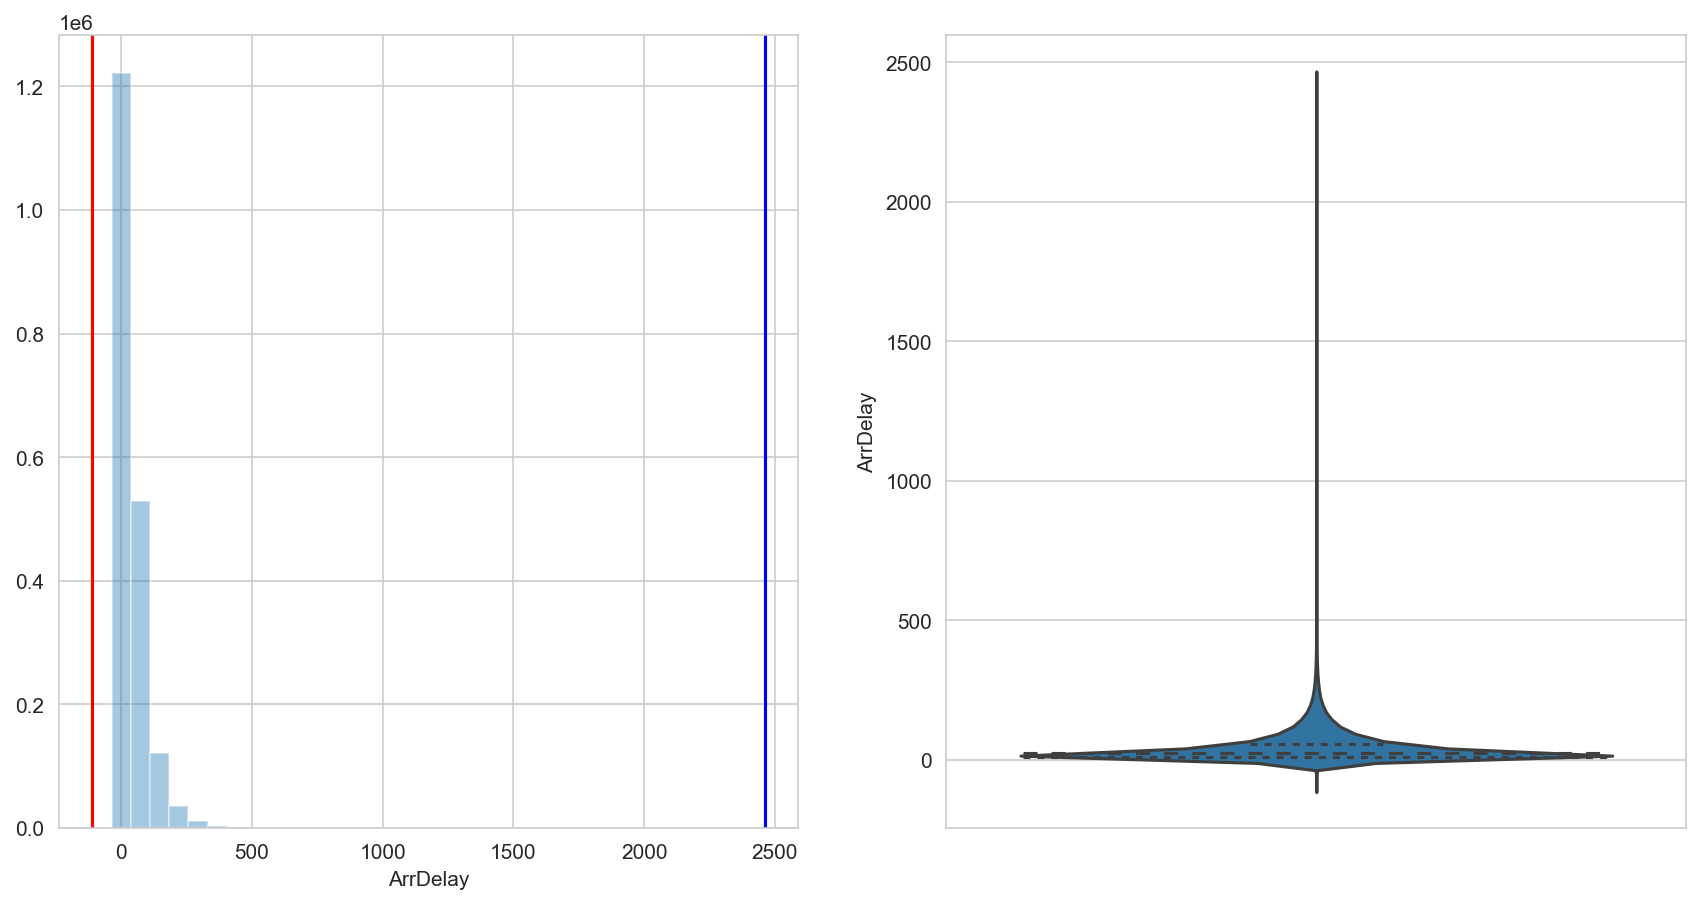

In [29]:
# histogram and violinplot of the ArrDelay distribution
fig, ax = plt.subplots(ncols=2)

base_color = sb.color_palette()[0]

#g = df['ArrDelay'].hist(bins=bins, color=sb.color_palette()[0], ax= ax[0])
g = sb.distplot(df['ArrDelay'], bins=bins, kde=False, ax= ax[0])
g.axvline(x=df['ArrDelay'].max(), color='b', label='Max');
g.axvline(x=df['ArrDelay'].min(), color='r', label='Min');

sb.violinplot(data=df, y='ArrDelay', inner='quartile', ax= ax[1])

plt.show()

In [30]:
print(f'99.5th percentile value: {df.ArrDelay.quantile(0.995)}')
print(f'Number of flights with ArrDelay above 99.5th percentile: {df.loc[df["ArrDelay"] > df.ArrDelay.quantile(0.995)].shape[0]}')
print(f'Proportion above 99.5th percentile: {df.loc[df["ArrDelay"] > df.ArrDelay.quantile(0.995)].shape[0]/df.shape[0]}')

99.5th percentile value: 308.1599999999162
Number of flights with ArrDelay above 99.5th percentile: 9642
Proportion above 99.5th percentile: 0.004978427845324863


In [31]:
size = df.loc[df['ArrDelay'] < df.ArrDelay.quantile(0.995)].shape[0]
bin_q = int(np.around(np.sqrt(size))) 
df_a = df.loc[df['ArrDelay'] < df.ArrDelay.quantile(0.995)]

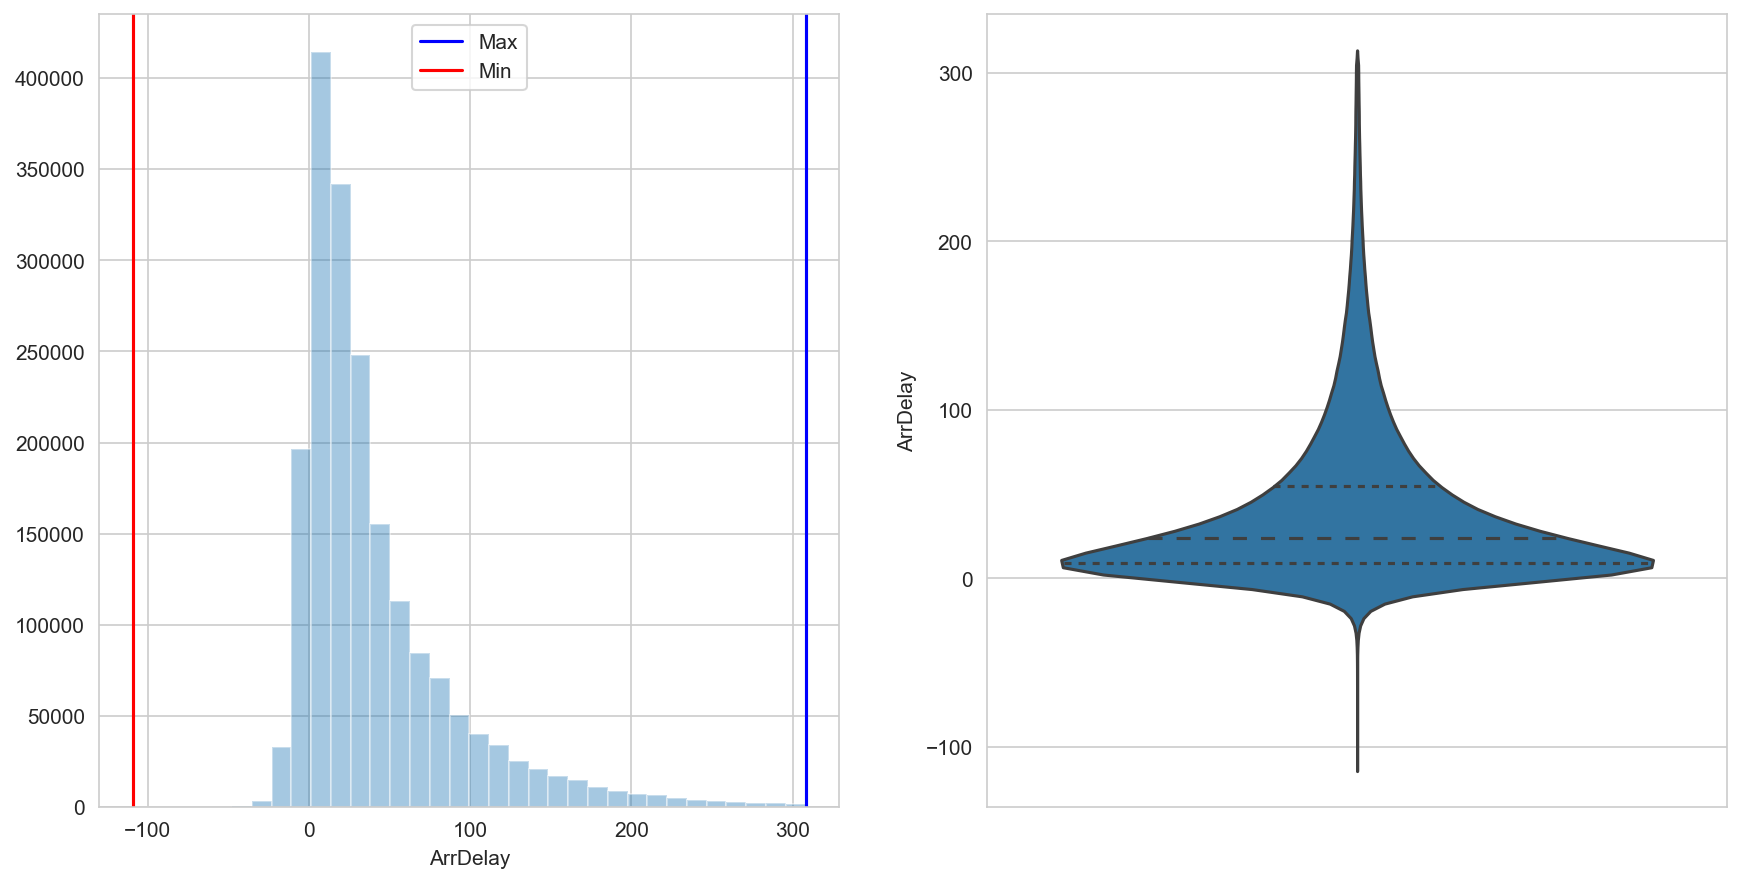

In [32]:
# Histogram and Violinplot of ArrDelay values below 99.5th percentile (0.995th quantile)
fig, ax = plt.subplots(ncols=2)

base_color = sb.color_palette()[0]
bins_a = len(np.histogram_bin_edges(df_a.loc[~df_a.ArrDelay.isna()].ArrDelay, bins='doane'))

g = sb.distplot(df_a['ArrDelay'], bins=bins_a, kde=False, ax= ax[0], color=base_color)

g.axvline(x=df_a['ArrDelay'].max(), color='b', label='Max');
g.axvline(x=df_a['ArrDelay'].min(), color='r', label='Min');

sb.violinplot(data=df_a, y='ArrDelay', inner='quartile', ax= ax[1])
g.legend()
plt.show()

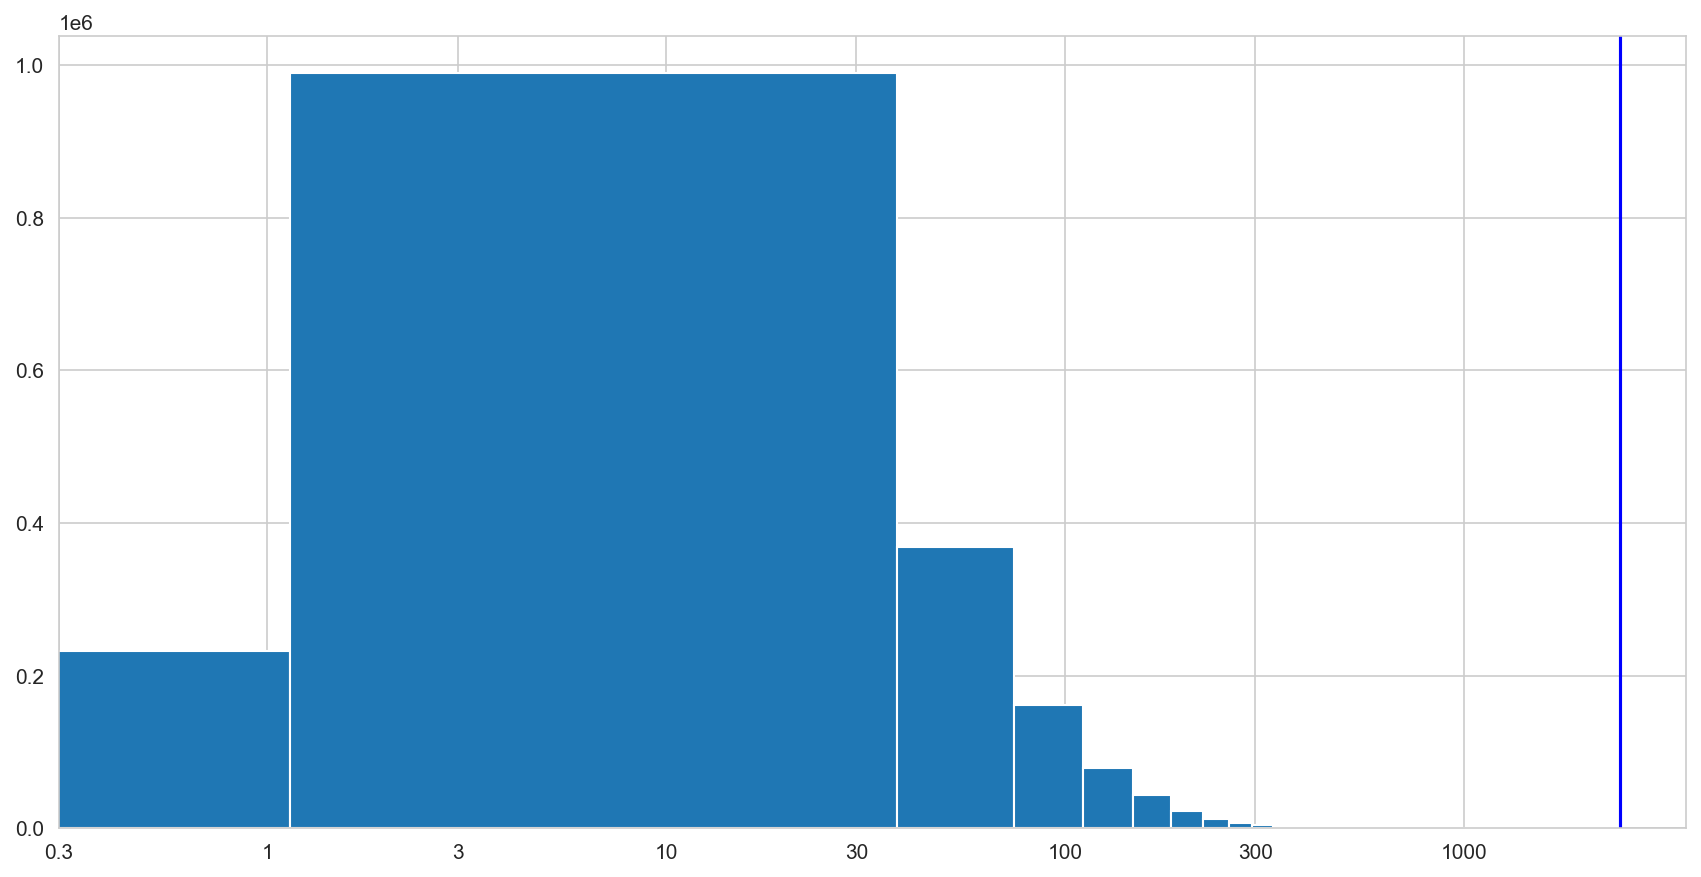

In [33]:
# histogram with log transformation
g = df.ArrDelay.hist(bins=bins*2);
g.axvline(x=df['ArrDelay'].max(), color='b', label='Max');
g.axvline(x=df['ArrDelay'].min(), color='r', label='Min');
plt.xscale('log');
ticks = [0.3,1,3,10,30,100,300,1000]
plt.xticks(ticks, ticks);

The violin plot and histogram for ArrDelay both show that the distribution is unimodal. They also show the presence of high outliers, leading to a left skewed distribution. 
In the cell above, we see that only **9642 (0.005%)** of the flights are above the 99.5th percentile.
Plotting the values below the 99.5th percentile doesnt do much to change the shape of the distribution; the mode moves slightly to the right. 
    

#### Delay Causes

Delay causes will be analysed together because of the variables' similarity. 

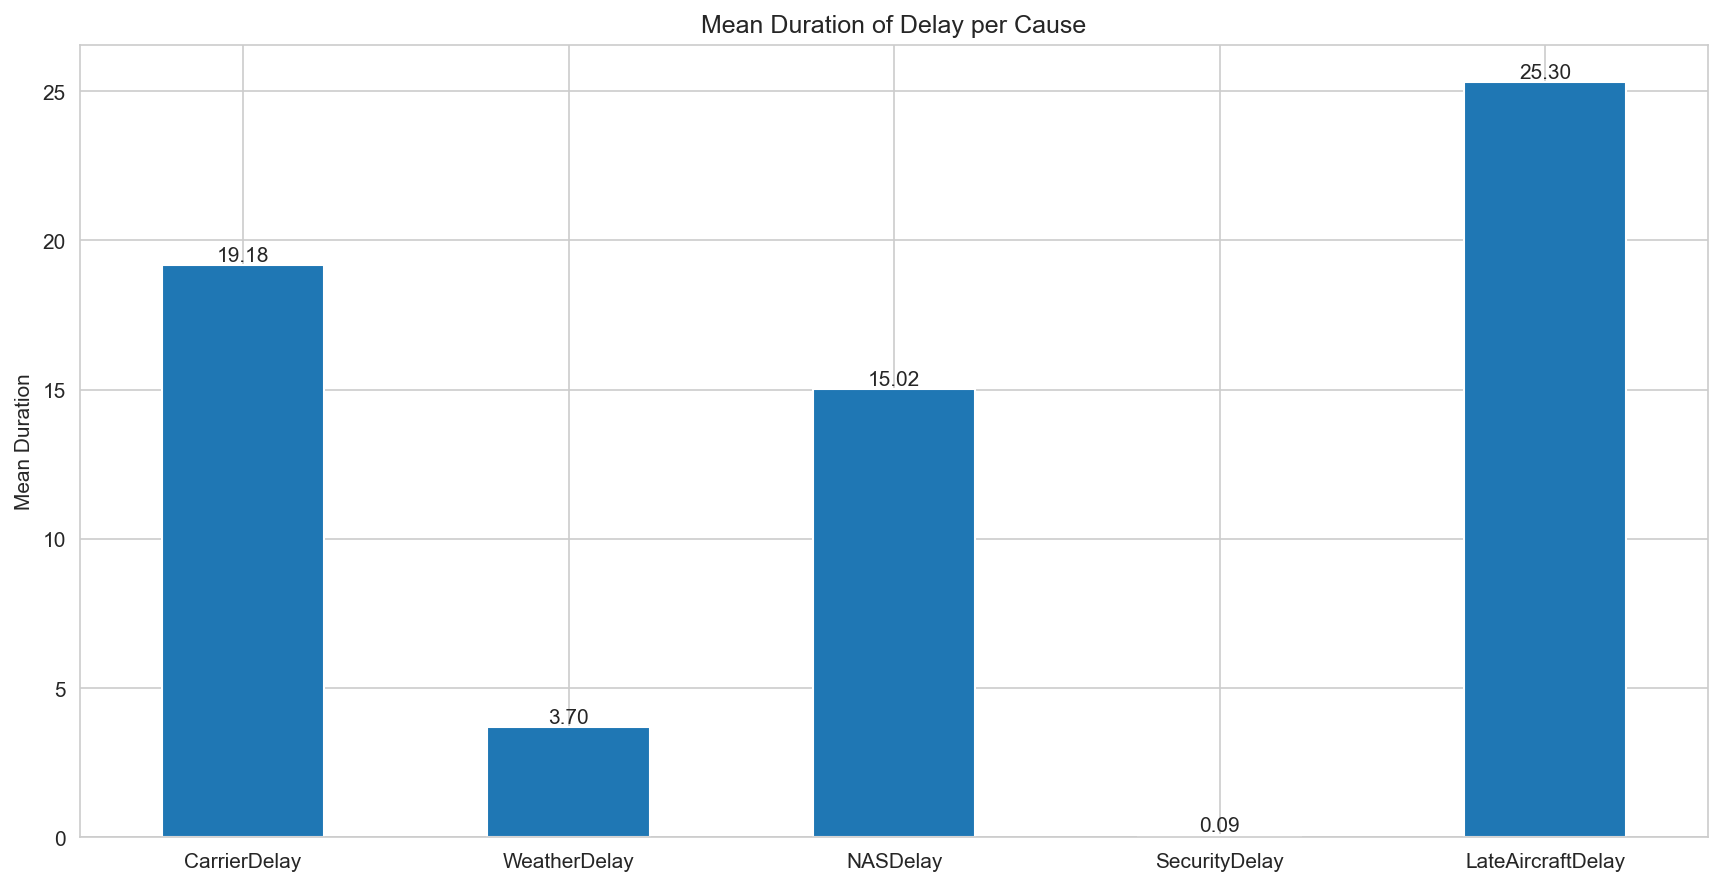

In [34]:
delay_list = ['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay']
g = df[delay_list].mean().plot(kind='bar')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}'.format(y), (x.mean(), y),
              ha='center', va='bottom')

plt.ylabel('Mean Duration')
plt.xticks(rotation=0)
plt.title('Mean Duration of Delay per Cause');

In [35]:
for i in df[delay_list].columns:
    print(f"{i} count: {df[delay_list][i].count()}")

CarrierDelay count: 1247486
WeatherDelay count: 1247486
NASDelay count: 1247486
SecurityDelay count: 1247486
LateAircraftDelay count: 1247486


Only 1,247,486 flights have delay cause recorded. The causes are carrier issues, weather, National Air System (NAS) delay, security and late aircraft.
Late aircraft causes the greatest average delay time (25.30 minutes) while security causes the lowest average delay time (0.09 minutes)

#### Flight Status

In [36]:
# number of flights in each flight status category
cat_list = list(df['FlightStatus'].value_counts().index.map(status_dict))
for i in np.arange(len(df['FlightStatus'].value_counts().index)):
    percentage = df["FlightStatus"].value_counts().values[i]/df.shape[0]*100
    print(f'{cat_list[i]} ({df["FlightStatus"].value_counts().index[i]}): {df["FlightStatus"].value_counts().values[i]} ({np.round(percentage, 2)})%')

Late (2): 1247486 (64.41)%
On Time (1): 680883 (35.16)%
Diverted (3): 7754 (0.4)%
Cancelled (4): 633 (0.03)%


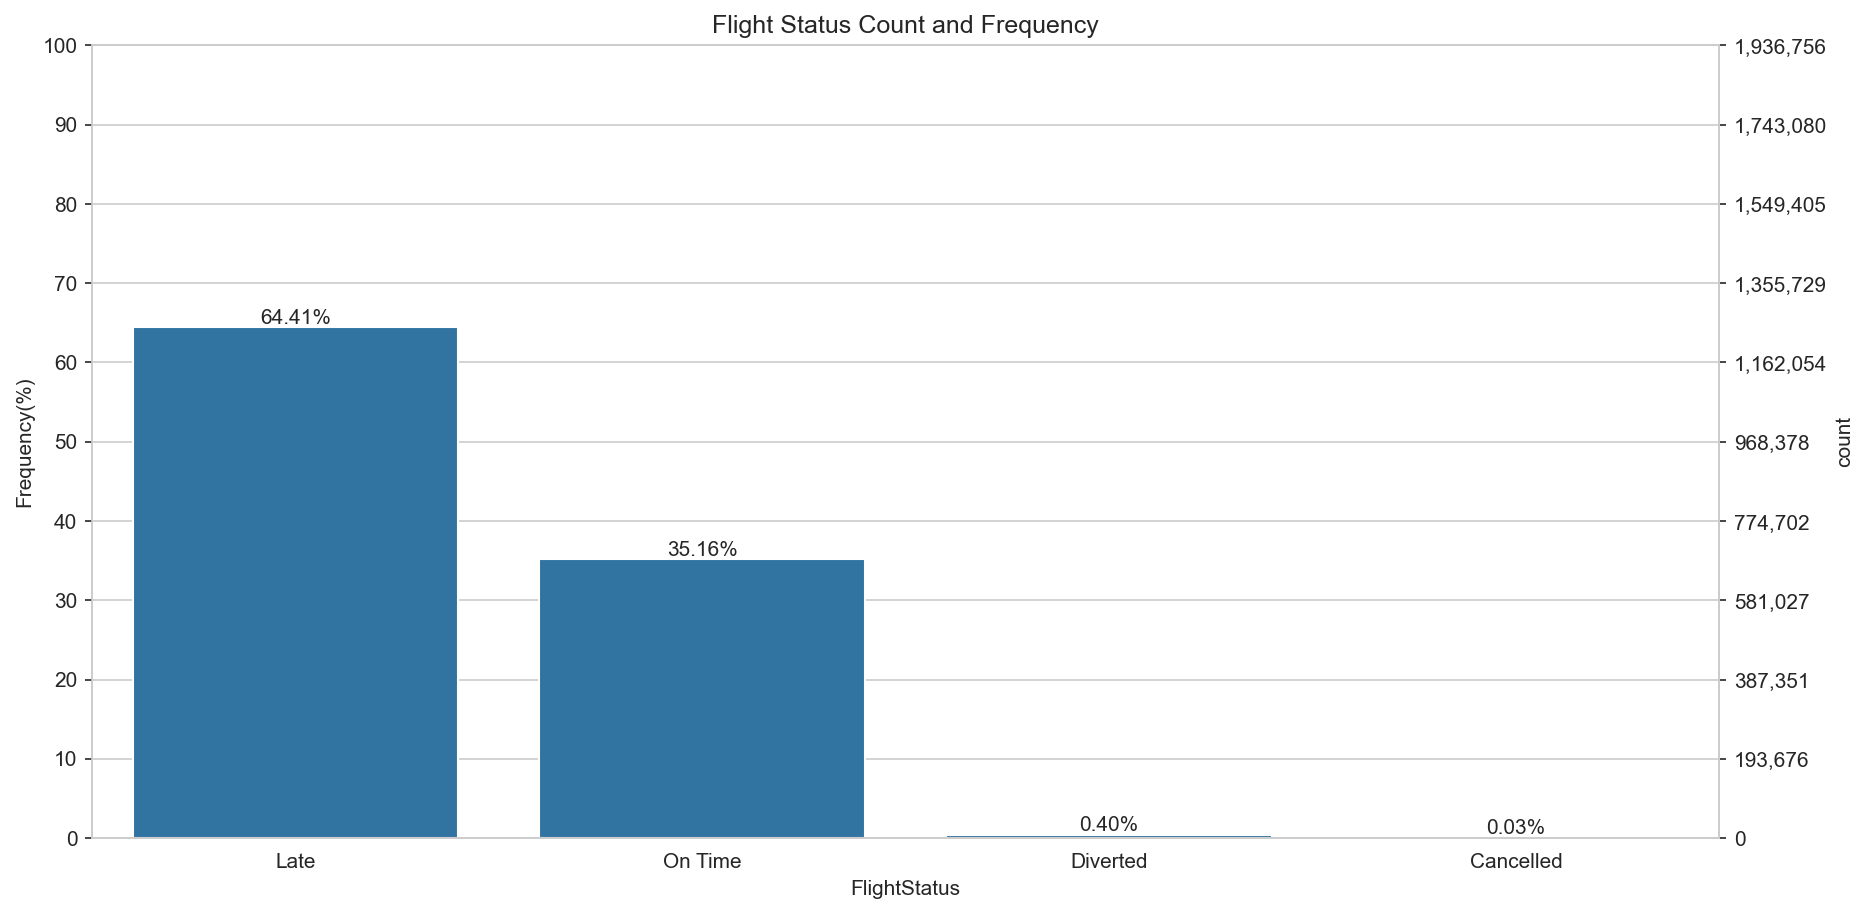

In [37]:
# plot countplot showing the counts and frequencies of Flight Status in descending order 
# layout of this was adapted from a tutorial on the matplotlib pyplot website
import matplotlib.ticker as ticker
g = sb.countplot(x='FlightStatus', data=df, order=df['FlightStatus'].value_counts().index, color=base_color)
plt.title('Flight Status Count and Frequency')
ticks = list(df['FlightStatus'].value_counts().index.map(status_dict))
#make twin axes
g2 = g.twinx()

#switch second and label y-axis to right
g2.yaxis.tick_left()    
g.yaxis.tick_right()

g.yaxis.set_label_position('right')
g2.yaxis.set_label_position('left')

g2.set_ylabel('Frequency(%)')

for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100.*y/len(df)), (x.mean(), y),
              ha='center', va='bottom')
    
g.yaxis.set_major_locator(ticker.LinearLocator(11))

g2.set_ylim(0,100)
g.set_ylim(0,len(df))

ylabels = [format(label, ',.0f') for label in g.get_yticks()]
g.set_yticklabels(ylabels)
    
g2.yaxis.set_major_locator(ticker.MultipleLocator(10))

g2.grid(None)
g.set_xticklabels(ticks);

Only 35.2% of flights in Diverted and Cancelled flights accounted for approximately 0.40% and 0.03% of total flights in the dataset. 

#### Flight Date

In [38]:
# summary statistics for FlightDate column
df.FlightDate.describe()

count                 1936756
unique                 271193
top       2008-12-22 06:00:00
freq                      106
first     2008-01-01 00:25:00
last      2008-12-31 23:59:00
Name: FlightDate, dtype: object

In [39]:
# summary stats for FlightDate date component (excluding time)
df.FlightDate.dt.date.describe()

count        1936756
unique           366
top       2008-01-02
freq           10857
Name: FlightDate, dtype: object

While 2nd of January had the most flights in the year (10857 flights), the specific departure time with the most flights scheduled for departure was 6am on the 22nd of December (106 flights), most likely due to the large number of people flying home for Christmas.   

#### Month

In [40]:
# total number of flights per month
df.FlightDate.dt.month_name().value_counts()

December     203385
June         200914
March        200842
February     189532
January      183527
July         182945
August       162648
April        155264
May          153072
November     105563
October      103525
September     95539
Name: FlightDate, dtype: int64

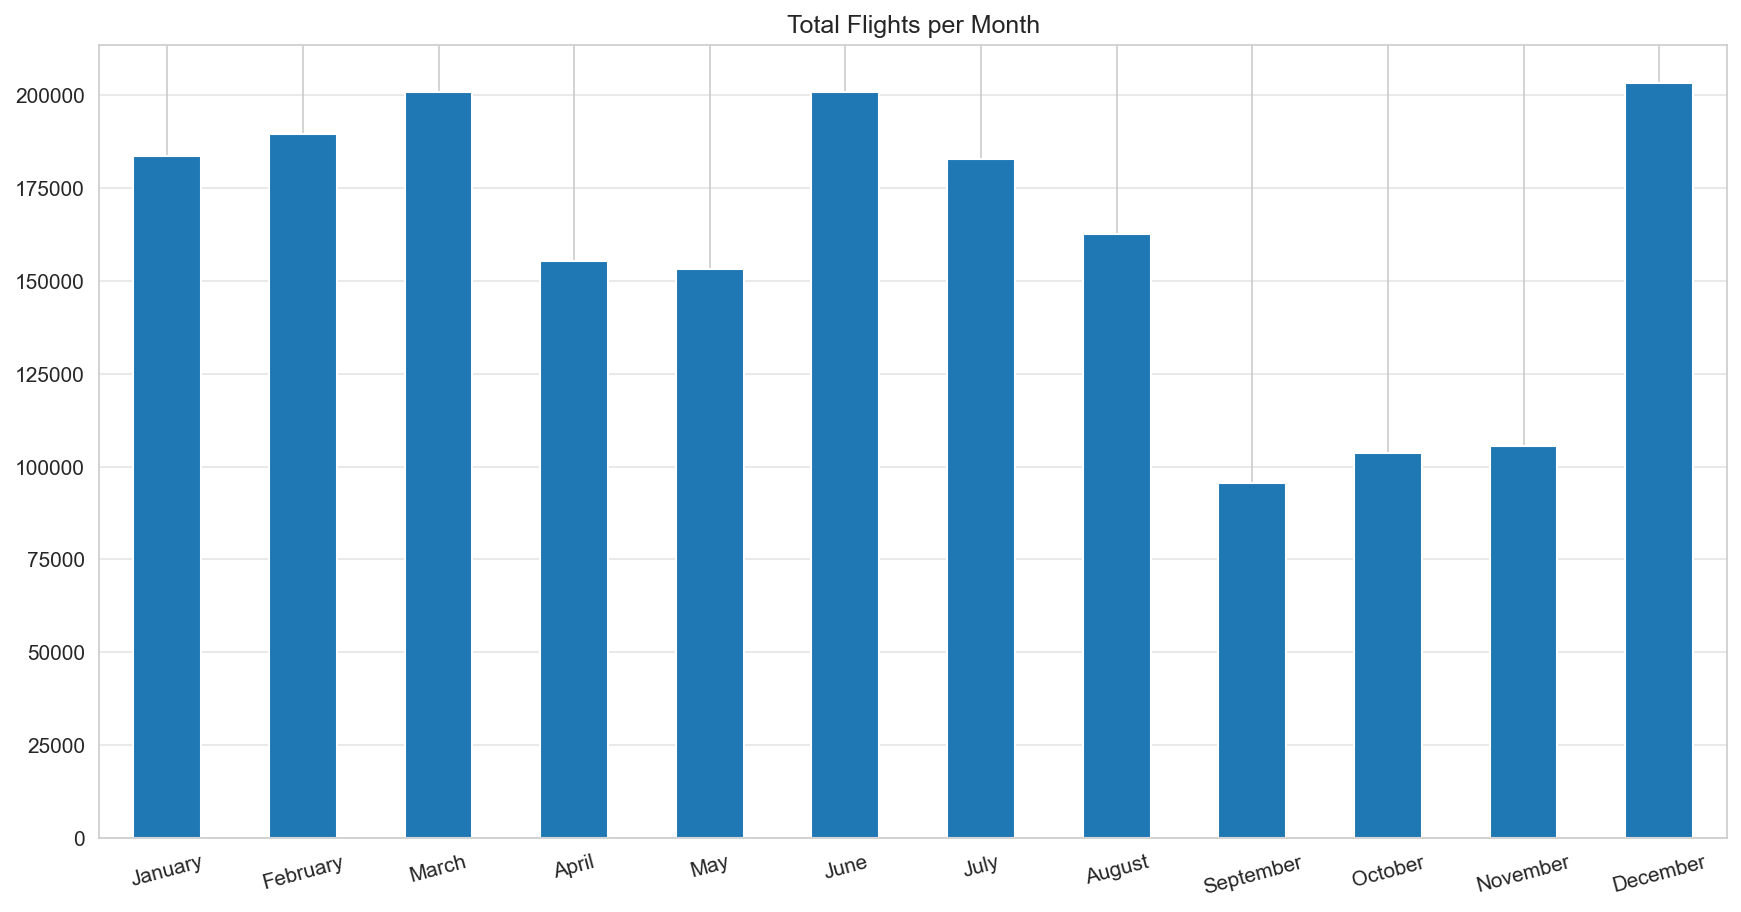

In [41]:
# barchart of flight count per month
months = ['January','February','March','April','May','June',
          'July','August','September','October','November','December']
g = df.FlightDate.dt.month_name().value_counts().reindex(months).plot(kind='bar', title='Total Flights per Month');
ticks = [x for x in df.FlightDate.dt.month_name().value_counts().reindex(months).index]
g.set_xticklabels(ticks, rotation=15);
g.grid('on', which='major', axis='y', alpha=0.5);

Flight count throughout the year peaked during March, June and December. December was the busiest month of the year with a  total of 203385 flights. The second and third busiest months are June and March  with 200914 and 200842 flights respectfully. The least busy
period was September throught November. 

#### Day of Week

In [42]:
# Total number of flights per day of week
df.FlightDate.dt.day_name().value_counts()

Friday       323259
Monday       290933
Thursday     289449
Sunday       286111
Wednesday    262805
Tuesday      260943
Saturday     223256
Name: FlightDate, dtype: int64

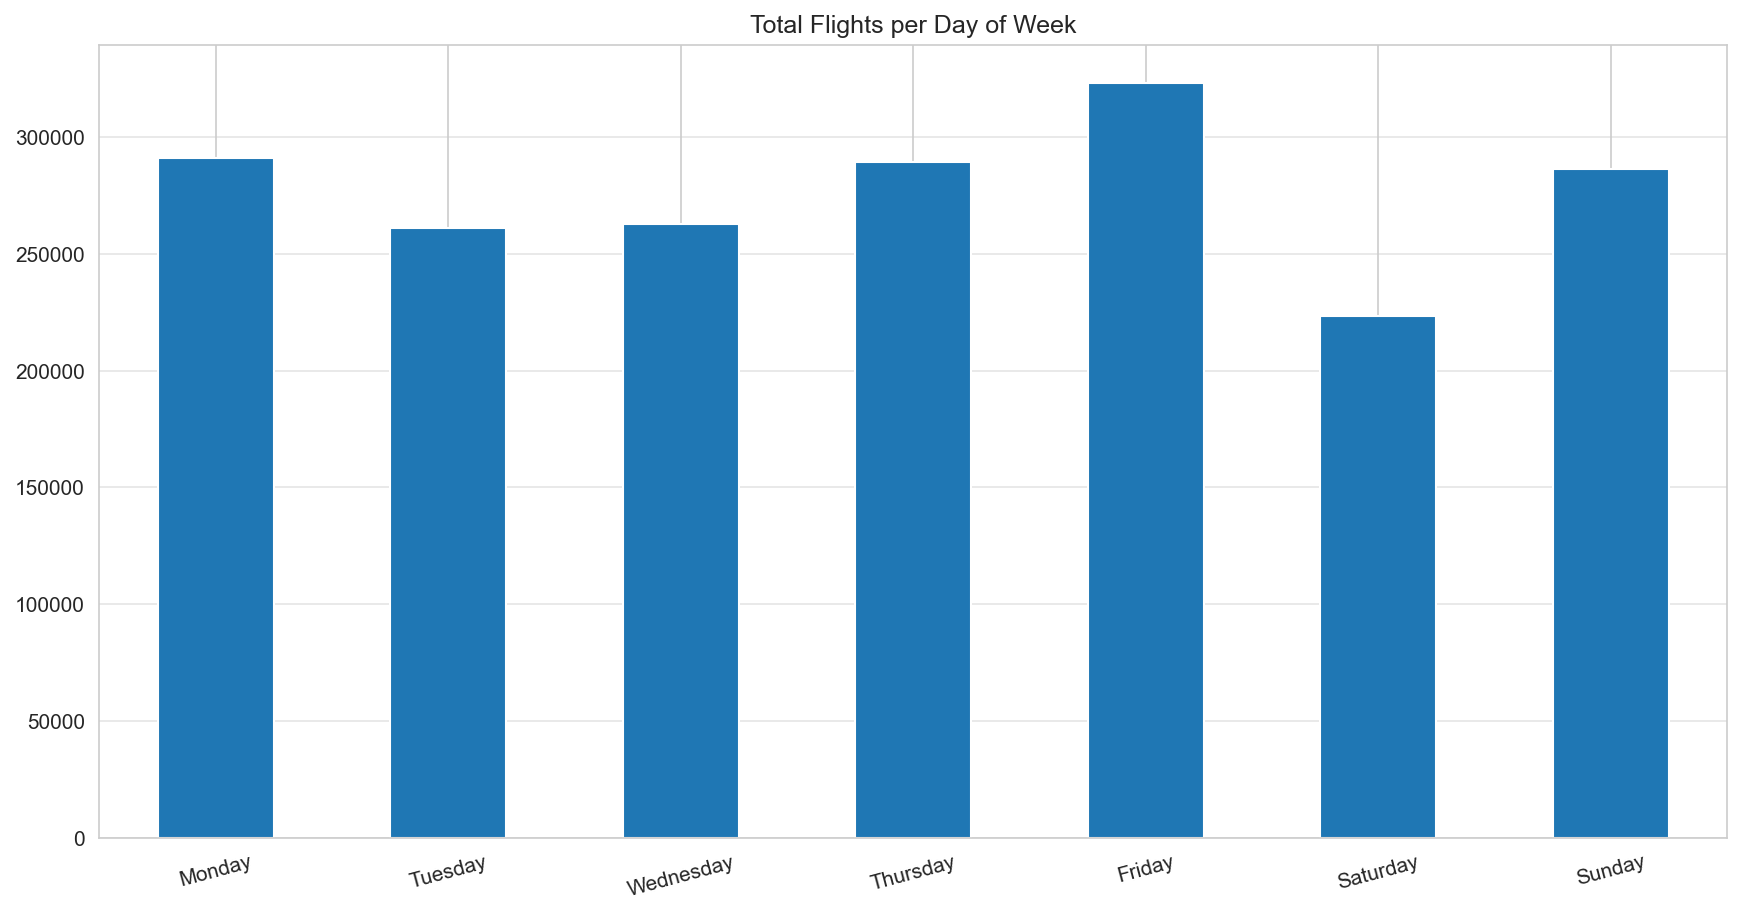

In [43]:
# barchart of flight count per day of week
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = df.FlightDate.dt.day_name().value_counts().reindex(days).plot(kind='bar', title='Total Flights per Day of Week');
ticks = [x for x in df.FlightDate.dt.day_name().value_counts().reindex(days).index]

g.set_xticklabels(ticks, rotation=15);
g.grid('on', which='major', axis='y', alpha=0.5);

The day of the week with the most scheduled flights was Friday. There are no observable trends in flight count by weekdays. 

#### Day of Month

Text(0, 0.5, 'Flight Count')

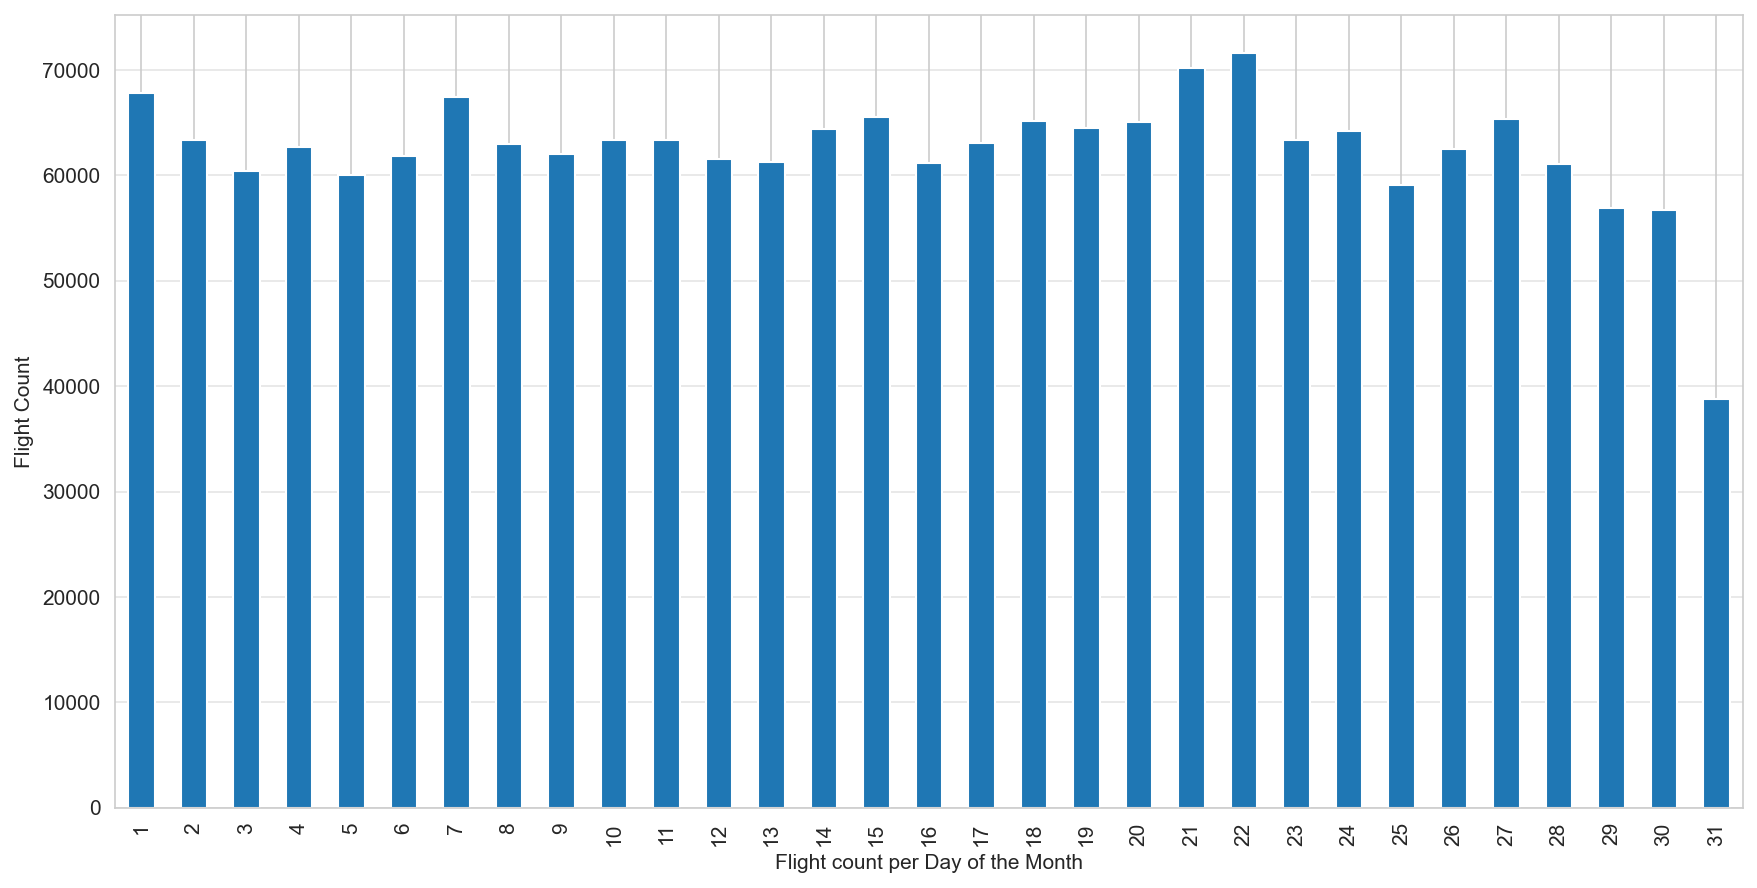

In [44]:
# barchart of flight count for each day of the month
g = df.FlightDate.dt.day.value_counts().reindex(np.arange(1,32,1)).plot(kind='bar')
g.grid('on', which='major', axis='y', alpha=0.5)
g.set_xlabel('Flight count per Day of the Month')
g.set_ylabel('Flight Count')

Flight count stayed fairly constant throughout the month. 31st was the day with the fewest due the infrequency of that day from month to month. 

#### Scheduled Departure Time

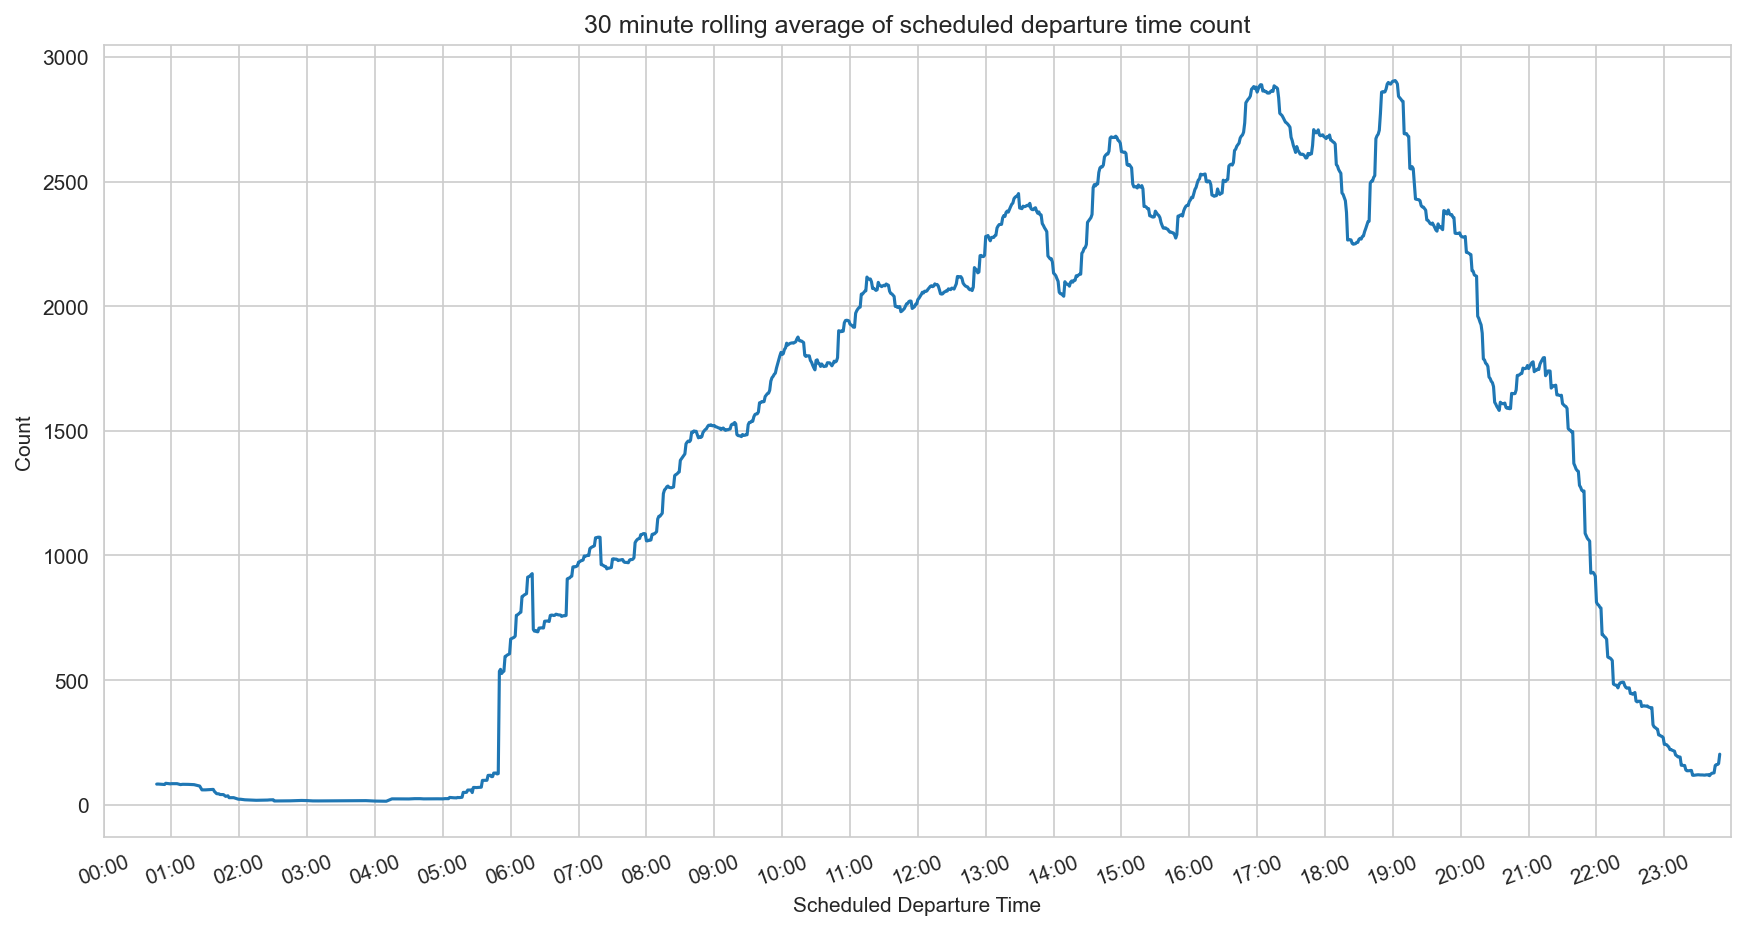

In [45]:
# linechart of flight count by CRSDepTime (15 minute rolling window)
hours = [dt.time(i).strftime('%H:%M') for i in range(24)]
df.groupby(by='CRSDepTime').size().rolling(30).mean().shift(-10).plot(kind='line')
plt.xticks(hours, hours, rotation=20);
plt.title('30 minute rolling average of scheduled departure time count');
plt.xlabel('Scheduled Departure Time');
plt.ylabel('Count');

Majority of flights were scheduled between 6am and 11pm with peaks at every hour, the highest being at 7pm. 

#### Unique Carrier

In [46]:
# print column names in the carriers dataframe
print(df_carriers.columns)

Index(['Code', 'Description'], dtype='object')


In [47]:
# create dictionary with carrier code as key and carrier description as value
carrier_dict = dict(zip(df_carriers.Code, df_carriers.Description))

In [48]:
# print carriers in descending total flight value count
cat_list = list(df['UniqueCarrier'].value_counts().index.map(carrier_dict))
for i in np.arange(len(df['UniqueCarrier'].value_counts().index)):
    print(f'{cat_list[i]} ({df["UniqueCarrier"].value_counts().index[i]}): {df["UniqueCarrier"].value_counts().values[i]}')

Southwest Airlines Co. (WN): 377602
American Airlines Inc. (AA): 191865
American Eagle Airlines Inc. (MQ): 141920
United Air Lines Inc. (UA): 141426
Skywest Airlines Inc. (OO): 132433
Delta Air Lines Inc. (DL): 114238
Expressjet Airlines Inc. (XE): 103663
Continental Air Lines Inc. (CO): 100195
US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.) (US): 98425
Atlantic Southeast Airlines (EV): 81877
Northwest Airlines Inc. (NW): 79108
AirTran Airways Corporation (FL): 71284
Mesa Airlines Inc. (YV): 67063
JetBlue Airways (B6): 55315
Comair Inc. (OH): 52657
Pinnacle Airlines Inc. (9E): 51885
Alaska Airlines Inc. (AS): 39293
Frontier Airlines Inc. (F9): 28267
Hawaiian Airlines Inc. (HA): 7490
Aloha Airlines Inc. (AQ): 750


In [49]:
# update US Airlines value in dictionary
carrier_dict.update({'US':'US Airways Inc.'})

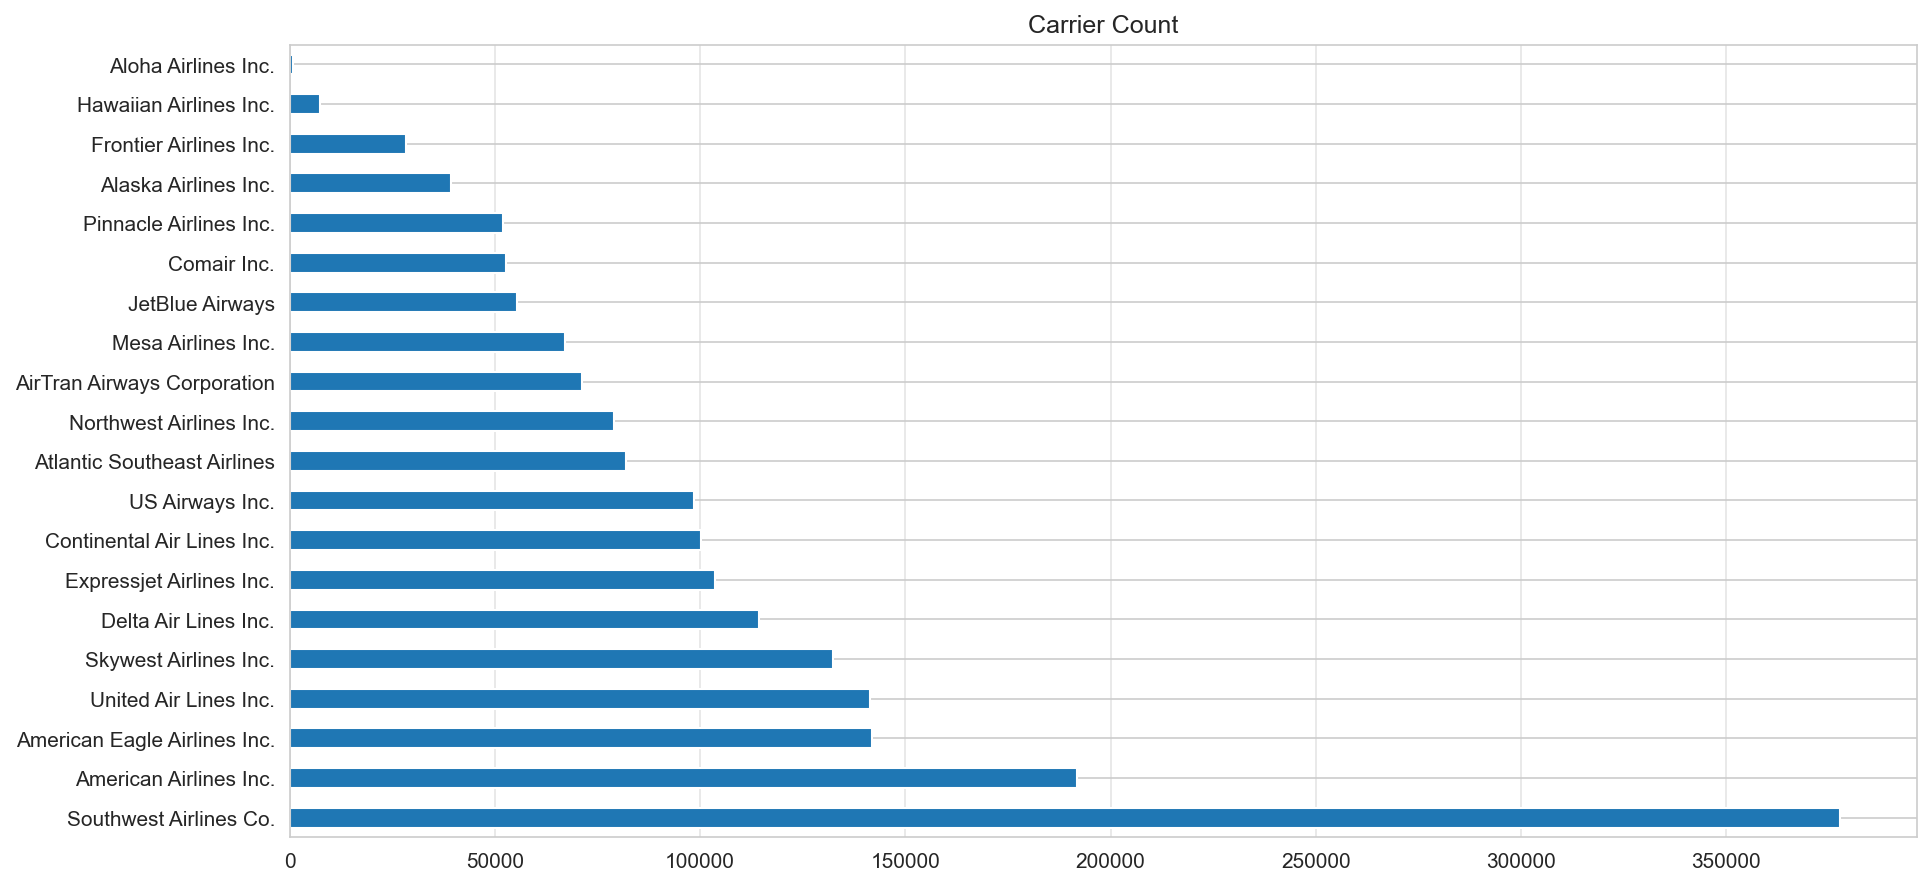

In [50]:
g = df.UniqueCarrier.value_counts().plot(kind='barh', title='Carrier Count');
ticks = [carrier_dict[x] for x in df.UniqueCarrier.value_counts().index]
g.set_yticklabels(ticks);
g.grid('on', which='major', axis='x', alpha=0.5);

Southwest Airlines was the carrier wiht the most flights in the dataset with 377602 flights in totatl, the second highest far  behind at 191865 flights (American Airlines). Aloha Airlines had the fewest flights in the dataset (750 flights)

#### Flight Origin

In [51]:
# create dictionary with iata codes as keys and airport names as values
iata_dict = df_airports.to_dict()

In [52]:
print(df_airports.columns)
iata_dict.keys()

Index(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'], dtype='object')


dict_keys(['iata', 'airport', 'city', 'state', 'country', 'lat', 'long'])

In [53]:
# print origin airport name along with corresponding iata code, location coordinates and total outgoing flights for 2008
code_list = list(iata_dict['iata'].values())
airport_list = list(iata_dict['airport'].values())
lat_list = list(iata_dict['lat'].values())
long_list = list(iata_dict['long'].values())

for i in list(df['Origin'].value_counts()[:20].index):
    index = code_list.index(i)
    index_a = list(df['Origin'].value_counts()[:20].index).index(i)
    print(f"{airport_list[index]} ({code_list[index]}). {df['Origin'].value_counts()[:20].values[index_a]} flights.")


William B Hartsfield-Atlanta Intl (ATL). 131613 flights.
Chicago O'Hare International (ORD). 125979 flights.
Dallas-Fort Worth International (DFW). 95414 flights.
Denver Intl (DEN). 74322 flights.
Los Angeles International (LAX). 58772 flights.
George Bush Intercontinental (IAH). 56847 flights.
Phoenix Sky Harbor International (PHX). 55720 flights.
McCarran International (LAS). 53709 flights.
Newark Intl (EWR). 52925 flights.
Detroit Metropolitan-Wayne County (DTW). 43923 flights.
San Francisco International (SFO). 43801 flights.
Orlando International (MCO). 36139 flights.
Charlotte/Douglas International (CLT). 35055 flights.
John F Kennedy Intl (JFK). 34706 flights.
Minneapolis-St Paul Intl (MSP). 32436 flights.
LaGuardia (LGA). 31185 flights.
Seattle-Tacoma Intl (SEA). 31060 flights.
Baltimore-Washington International (BWI). 30710 flights.
Philadelphia Intl (PHL). 30316 flights.
Chicago Midway (MDW). 29222 flights.


In [54]:
origin_df = df['Origin'].value_counts().rename_axis('iata').reset_index(name='counts')
origin_df = origin_df.merge(df_airports, on='iata', how='inner')

In [55]:
# proportion of flights the 10 most busy airports cater for
origin_df[:10].counts.sum()/origin_df.counts.sum()

0.3868448064702007

In [56]:
origin_df.head()

iata  counts                            airport               city state  \
0  ATL  131613  William B Hartsfield-Atlanta Intl            Atlanta    GA   
1  ORD  125979       Chicago O'Hare International            Chicago    IL   
2  DFW   95414    Dallas-Fort Worth International  Dallas-Fort Worth    TX   
3  DEN   74322                        Denver Intl             Denver    CO   
4  LAX   58772          Los Angeles International        Los Angeles    CA   

  country        lat        long  
0     USA  33.640444  -84.426944  
1     USA  41.979595  -87.904464  
2     USA  32.895951  -97.037200  
3     USA  39.858408 -104.667002  
4     USA  33.942536 -118.408074

In [57]:
# inline map showing the locations of the ten airports with the most outgoing flights
import plotly.graph_objects as go

mapbox_access_token = 'pk.eyJ1IjoiZWQta3kiLCJhIjoiY2tkeXVxYTRhMWh5ZDJxcGlpN3BneHJseCJ9.scWF7RGr_vtT7n9mKmdTjg'

fig = go.Figure(go.Scattermapbox(
        lat=origin_df[:20].lat,
        lon=origin_df[:20].long,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color='red'
        ),
        text=[origin_df[:20].airport[i] + '<br>' + str(origin_df[:20].counts[i]) + ' flights' for i in range(origin_df[:20].shape[0])],
    
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.8097343, 
            lon=-98.5556199
        ),
        pitch=0,
        zoom=2
    ),
)

fig.show()

The analysis of airports was restricted to the top 20 by count, due to the large number of possible airports in the dataset. The busiest by departure was William B Hartsfield-Atlanta Intl with 131613 total flights departing in 2008. the second and third were Chicago O'Hare Intl and Dallas-Fort Worth Intl with 125979 and 95414 flights departing respectfully. The top 20 airports are located in major metropolitan airports serving large populations. 

#### Flight Destination

In [58]:
# print destination airport name along with corresponding iata code, location coordinates and total outgoing flights for 2008
code_list = list(iata_dict['iata'].values())
airport_list = list(iata_dict['airport'].values())
lat_list = list(iata_dict['lat'].values())
long_list = list(iata_dict['long'].values())

for i in list(df['Dest'].value_counts()[:20].index):
    index = code_list.index(i)
    index_a = list(df['Dest'].value_counts()[:20].index).index(i)
    print(f"{airport_list[index]} ({code_list[index]}). {df['Dest'].value_counts()[:20].values[index_a]} flights.")


Chicago O'Hare International (ORD). 108984 flights.
William B Hartsfield-Atlanta Intl (ATL). 106898 flights.
Dallas-Fort Worth International (DFW). 70657 flights.
Denver Intl (DEN). 63002 flights.
Los Angeles International (LAX). 59969 flights.
Newark Intl (EWR). 55861 flights.
McCarran International (LAS). 48857 flights.
Phoenix Sky Harbor International (PHX). 47836 flights.
San Francisco International (SFO). 46876 flights.
George Bush Intercontinental (IAH). 43905 flights.
LaGuardia (LGA). 38137 flights.
Orlando International (MCO). 36405 flights.
John F Kennedy Intl (JFK). 35506 flights.
Detroit Metropolitan-Wayne County (DTW). 34777 flights.
Gen Edw L Logan Intl (BOS). 31961 flights.
Seattle-Tacoma Intl (SEA). 31548 flights.
Philadelphia Intl (PHL). 30795 flights.
Baltimore-Washington International (BWI). 29610 flights.
Salt Lake City Intl (SLC). 29217 flights.
Minneapolis-St Paul Intl (MSP). 28137 flights.


In [59]:
dest_df = df['Dest'].value_counts().rename_axis('iata').reset_index(name='counts')
dest_df = dest_df.merge(df_airports, on='iata', how='inner')

In [60]:
# proportion of flights the 10 most busy airports cater for
dest_df[:10].counts.sum()/dest_df.counts.sum()

0.3370816974363317

In [61]:
dest_df.head()

iata  counts                            airport               city state  \
0  ORD  108984       Chicago O'Hare International            Chicago    IL   
1  ATL  106898  William B Hartsfield-Atlanta Intl            Atlanta    GA   
2  DFW   70657    Dallas-Fort Worth International  Dallas-Fort Worth    TX   
3  DEN   63002                        Denver Intl             Denver    CO   
4  LAX   59969          Los Angeles International        Los Angeles    CA   

  country        lat        long  
0     USA  41.979595  -87.904464  
1     USA  33.640444  -84.426944  
2     USA  32.895951  -97.037200  
3     USA  39.858408 -104.667002  
4     USA  33.942536 -118.408074

In [62]:
# inline map showing the locations of the ten airports with the most incoming flights
import plotly.graph_objects as go

mapbox_access_token = 'pk.eyJ1IjoiZWQta3kiLCJhIjoiY2tkeXVxYTRhMWh5ZDJxcGlpN3BneHJseCJ9.scWF7RGr_vtT7n9mKmdTjg'
#open(".mapbox_token").read()

fig = go.Figure(go.Scattermapbox(
        lat=dest_df[:20].lat,
        lon=dest_df[:20].long,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color='red'
        ),
        text=[dest_df[:20].airport[i] + '<br>' + str(dest_df[:20].counts[i]) + ' flights' for i in range(dest_df[:20].shape[0])],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.8097343, 
            lon=-98.5556199
        ),
        pitch=0,
        zoom=2
    ),
)

fig.show()

The busiest by departure was Chicago O'Hare Intl with 108984 total flights arriving in 2008. the second and third were William B Hartsfield-Atlanta Intl and Dallas-Fort Worth Intl with 106898 and 70657 flights arriving respectfully. 

In [63]:
# number of airports in top 10 of both origin and destination
(dest_df.airport[:10].isin(origin_df.airport[:10])).sum()

9

9/10 airports were present in the top 10 busiest list by both origin and destination. 

#### Cancellation Codes

In [64]:
df[df.FlightStatus == 4].CancellationCode.value_counts()

B    307
A    246
C     80
N      0
Name: CancellationCode, dtype: int64

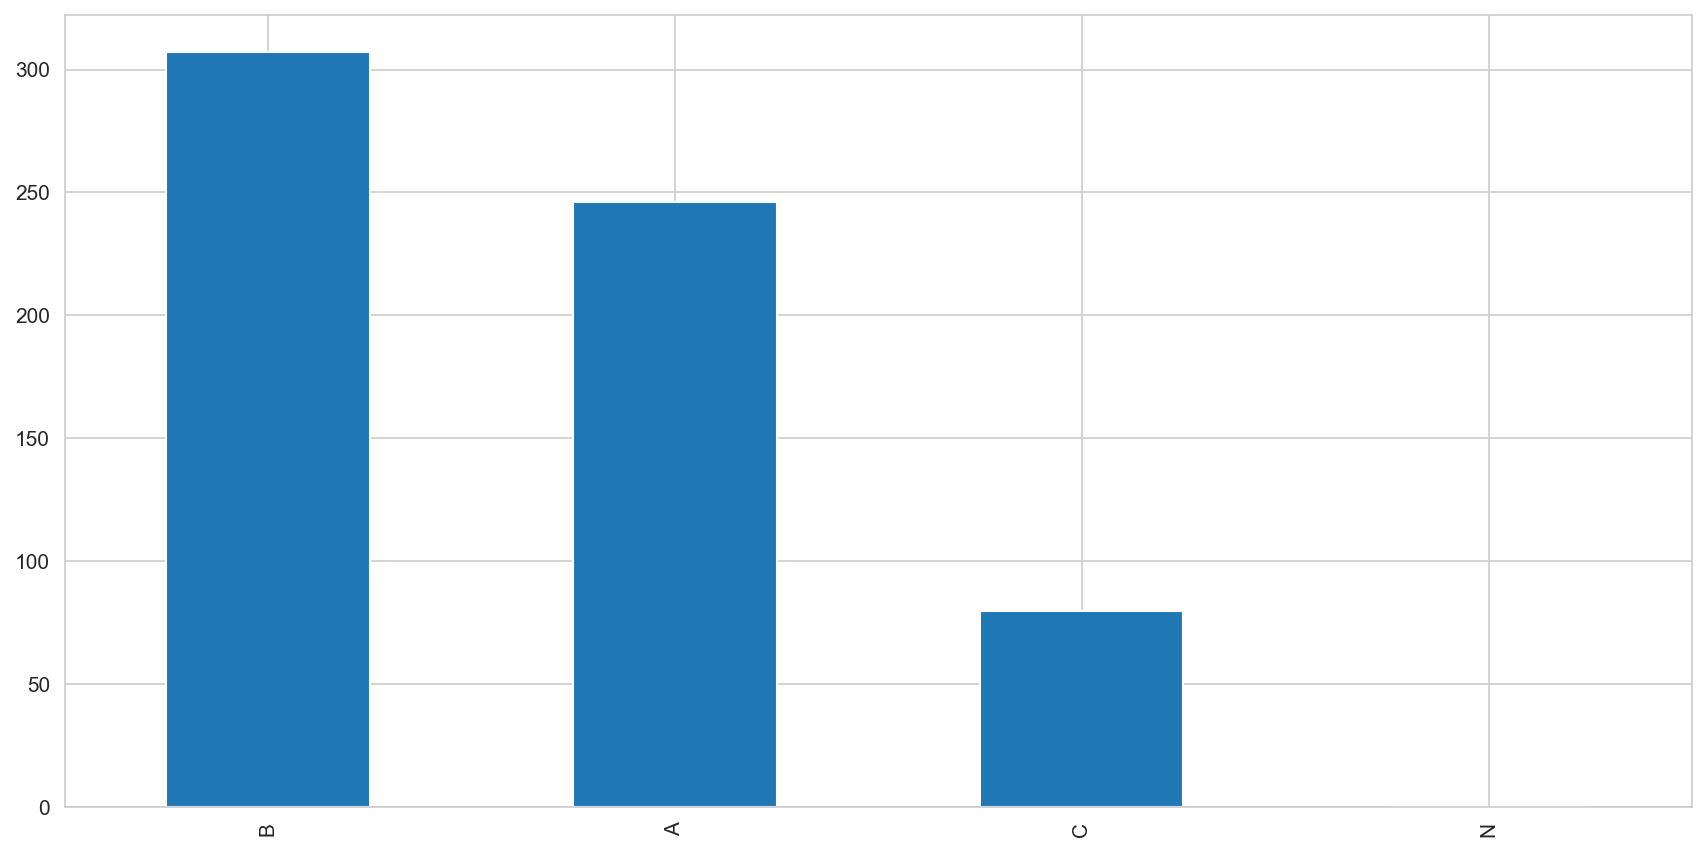

In [65]:
df[df.CancellationCode != 'N'].CancellationCode.value_counts().plot(kind='bar')

[This](http://stat-computing.org/dataexpo/2009/the-data.html) site lists codes A, B, C and D as representing Carrier, Weather, National Air Service and Security as causes for cancellation. 
From the dataset, in 2008 there were no cancellation due to Security reasons. Weather caused the most cancellations that year (307 flights) followed by Carrier and National Air Service in that order. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Both a histogram and violin plot ArrDelay was skewed left due to the presence of high outliers. Removal of values above the 99.5th percentile did not significantly change the shape of the distribution, so the outliers were not deleted. A histogram with log transformation of the x-axis gave the distribution a more normal distribution, albeit still a little skewed. 

Carrier, National Air System and Late Aircraft seemed to cause the greatest delays with Security causing close to 0 delays. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

A line plot of departure time showed that there were few flights scheduled to depart between 11pm and 6am. 

Weather caused the most cancellations, followed by Carrier and National Air Service. 

## Bivariate Exploration

#### Correlation Matrix

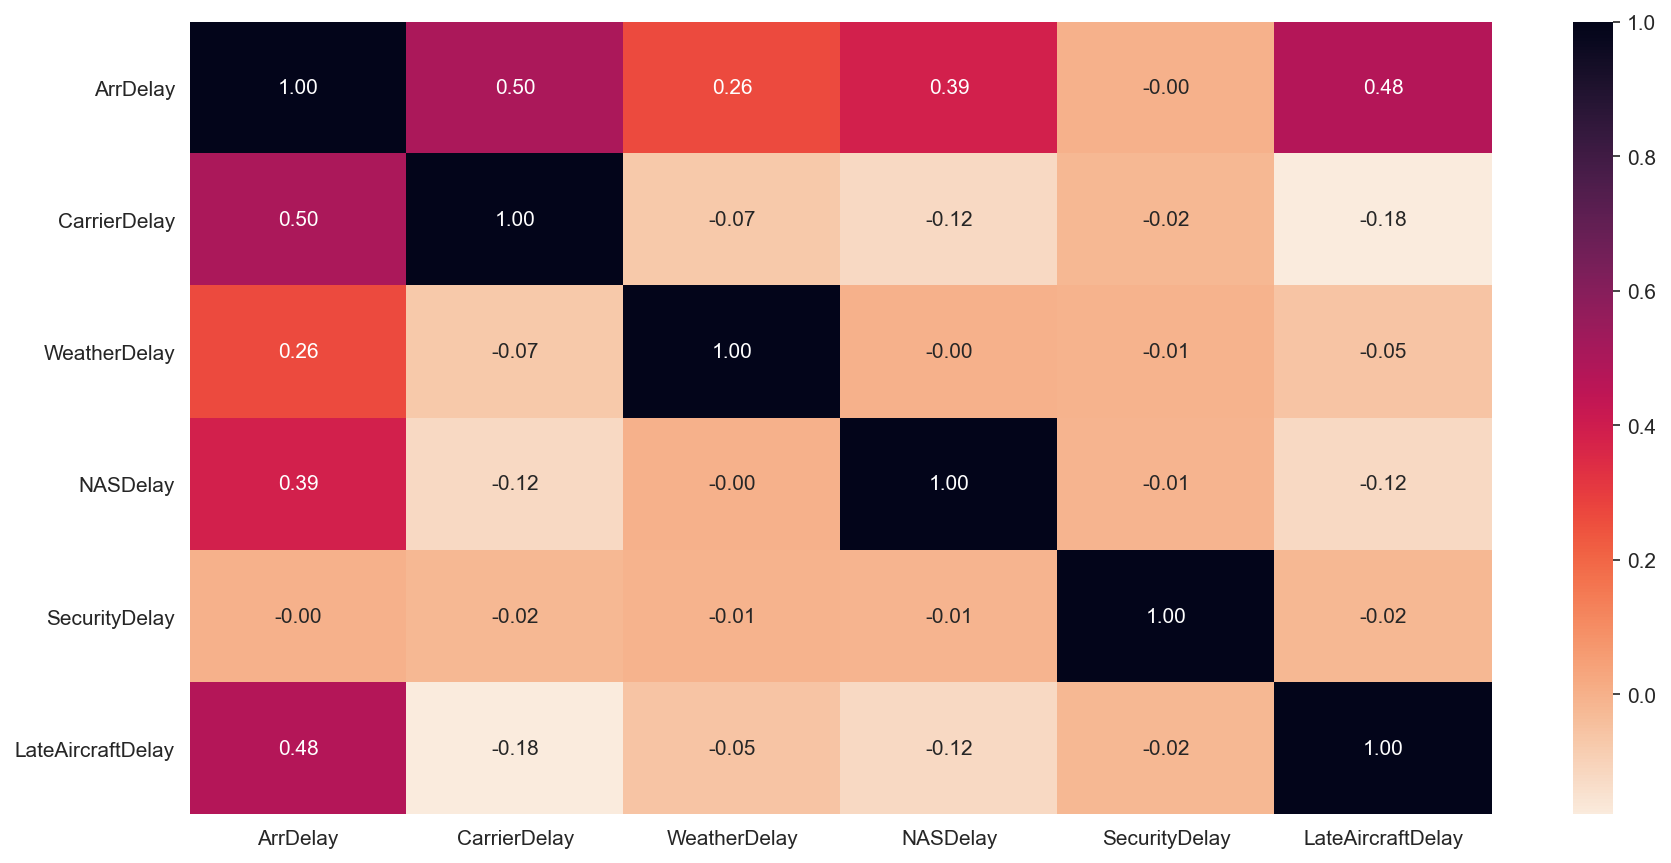

In [66]:
sb.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sb.cm.rocket_r);
plt.yticks(rotation=0);

C:\Users\Personal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Personal\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



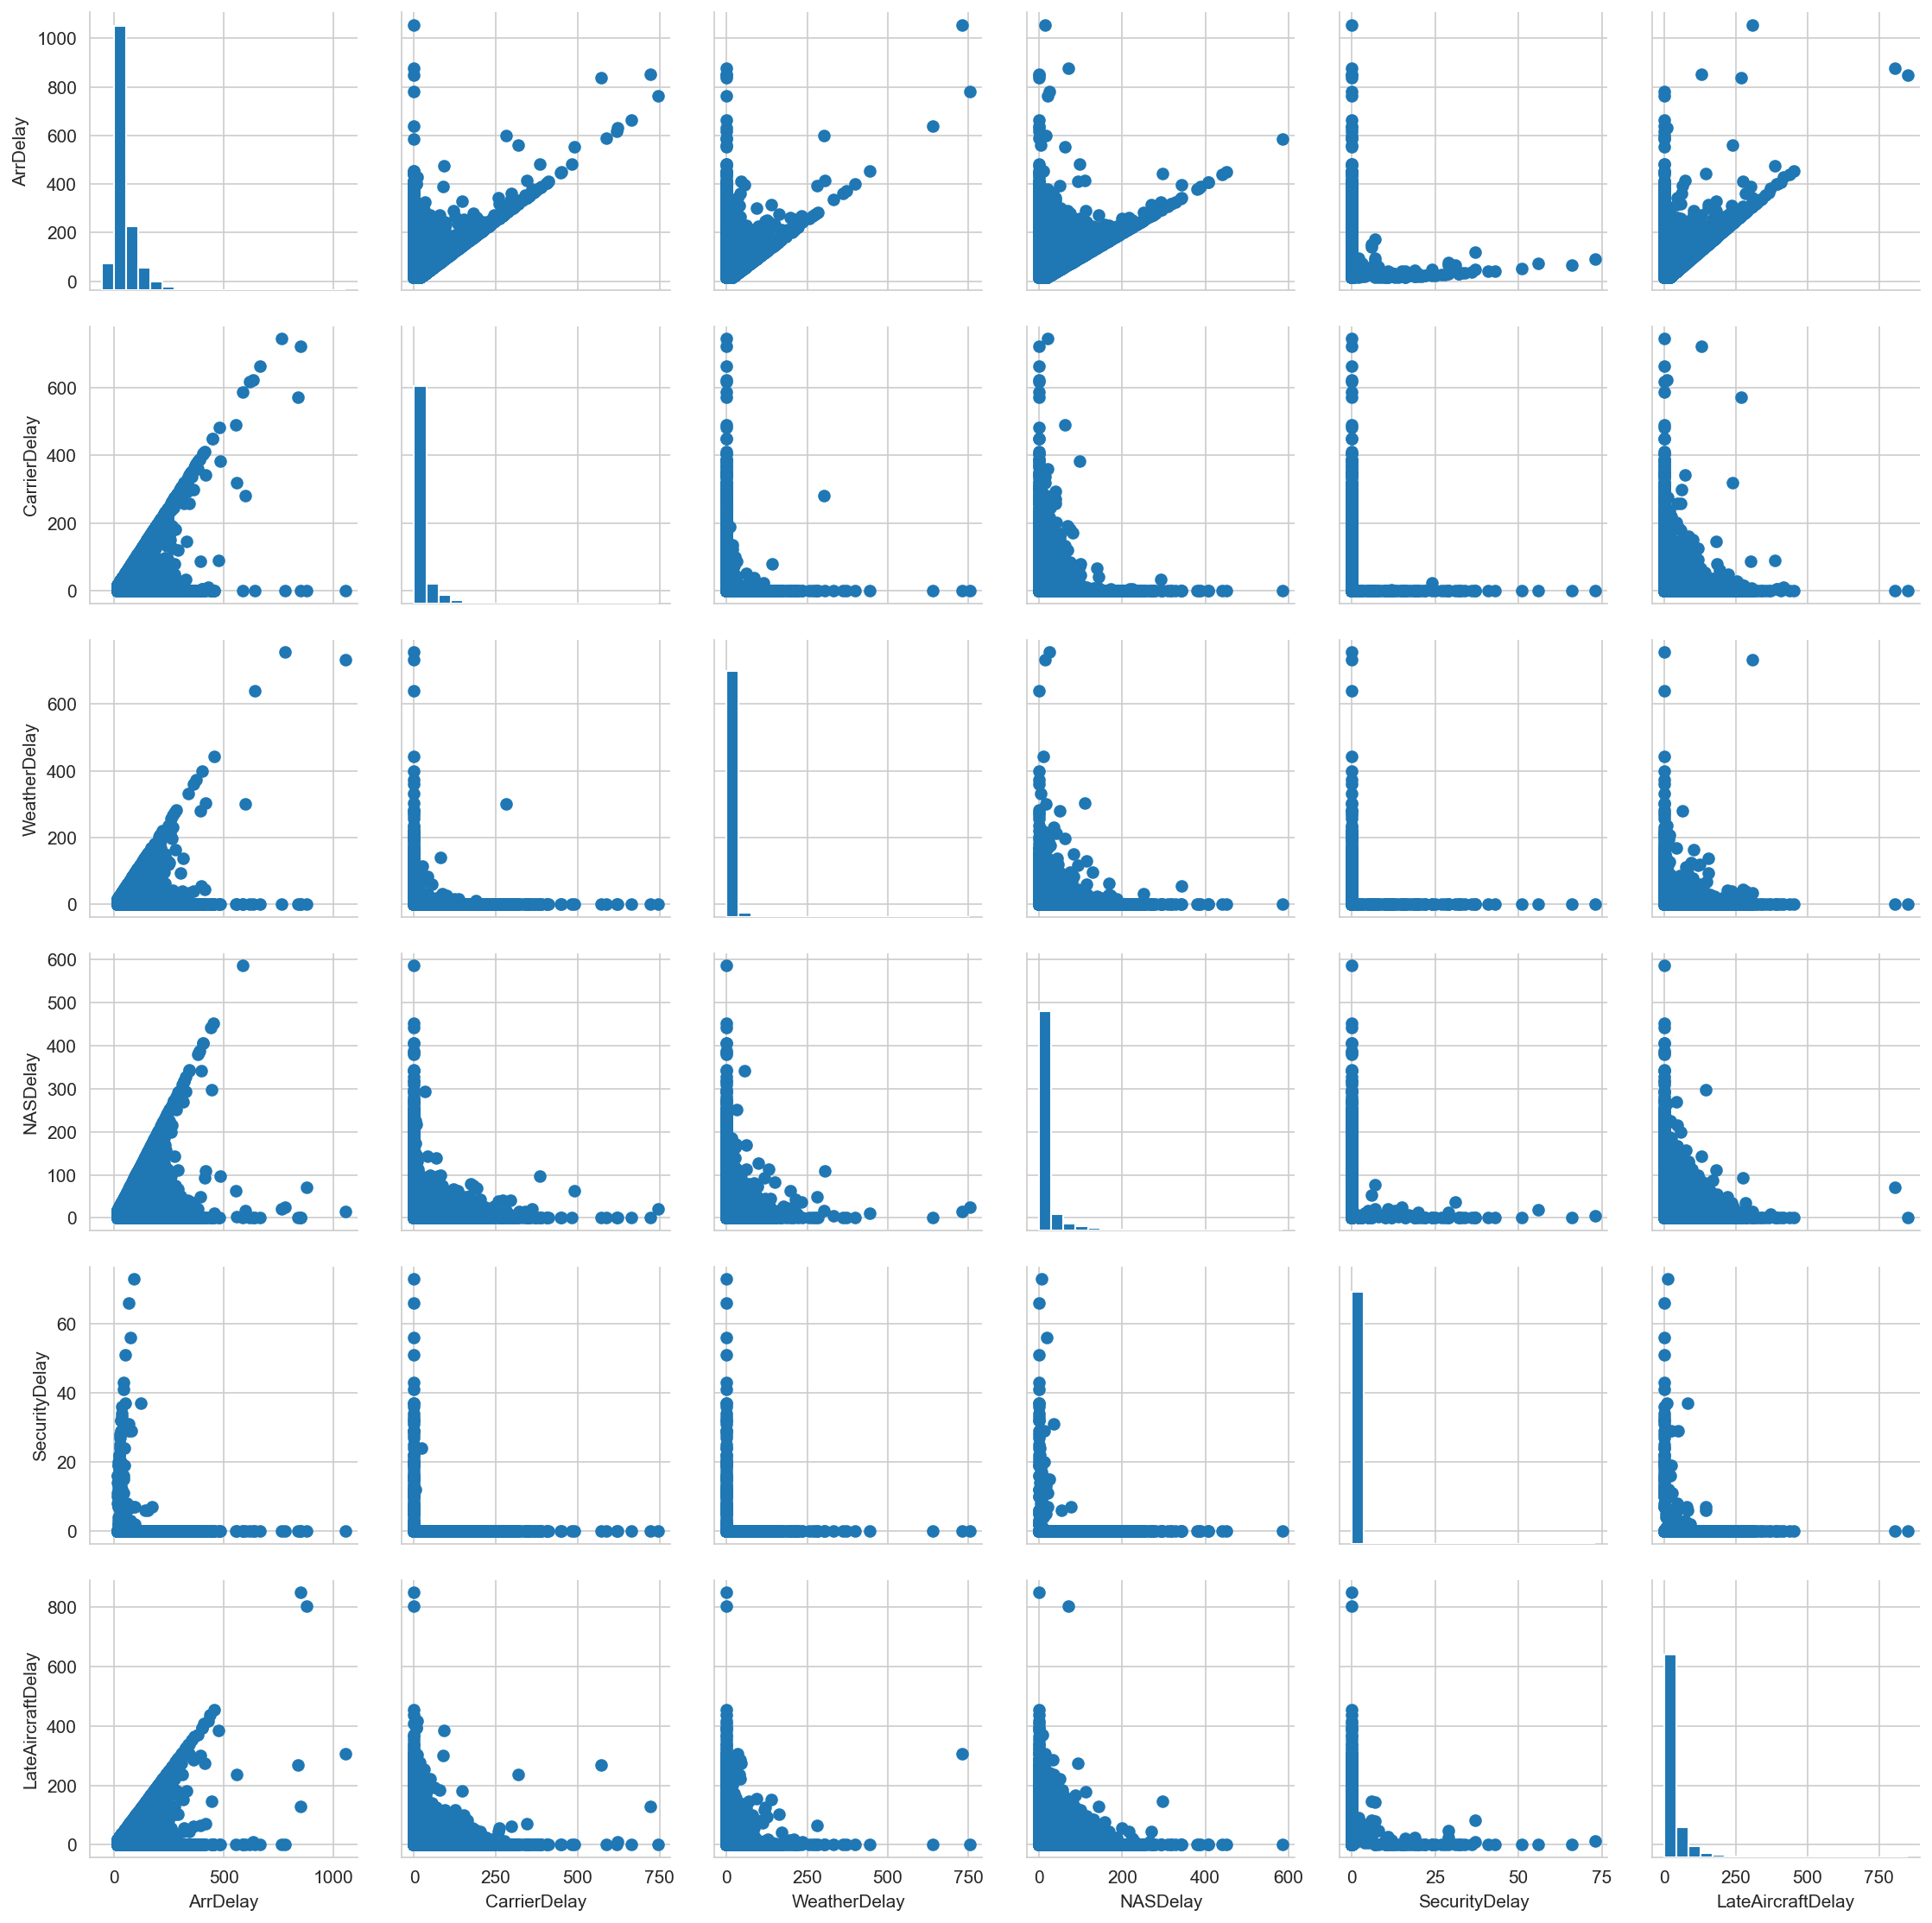

In [67]:
numeric_vars = ['ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay']
g = sb.PairGrid(data = df.sample(20000), vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

Delay duration of greater than 15 minutes is further subdivided into the duration of delay by individual cause. From the heatmap and pairplot above, we see teat of the causes documented, CarrierDelay, NASDelay and Late AircraftDelay are the most correlated with ArrDelay, albeit moderately (0.39 - 0.5 Pearson coefficient)

#### Mean Arrival Delay Time by Month

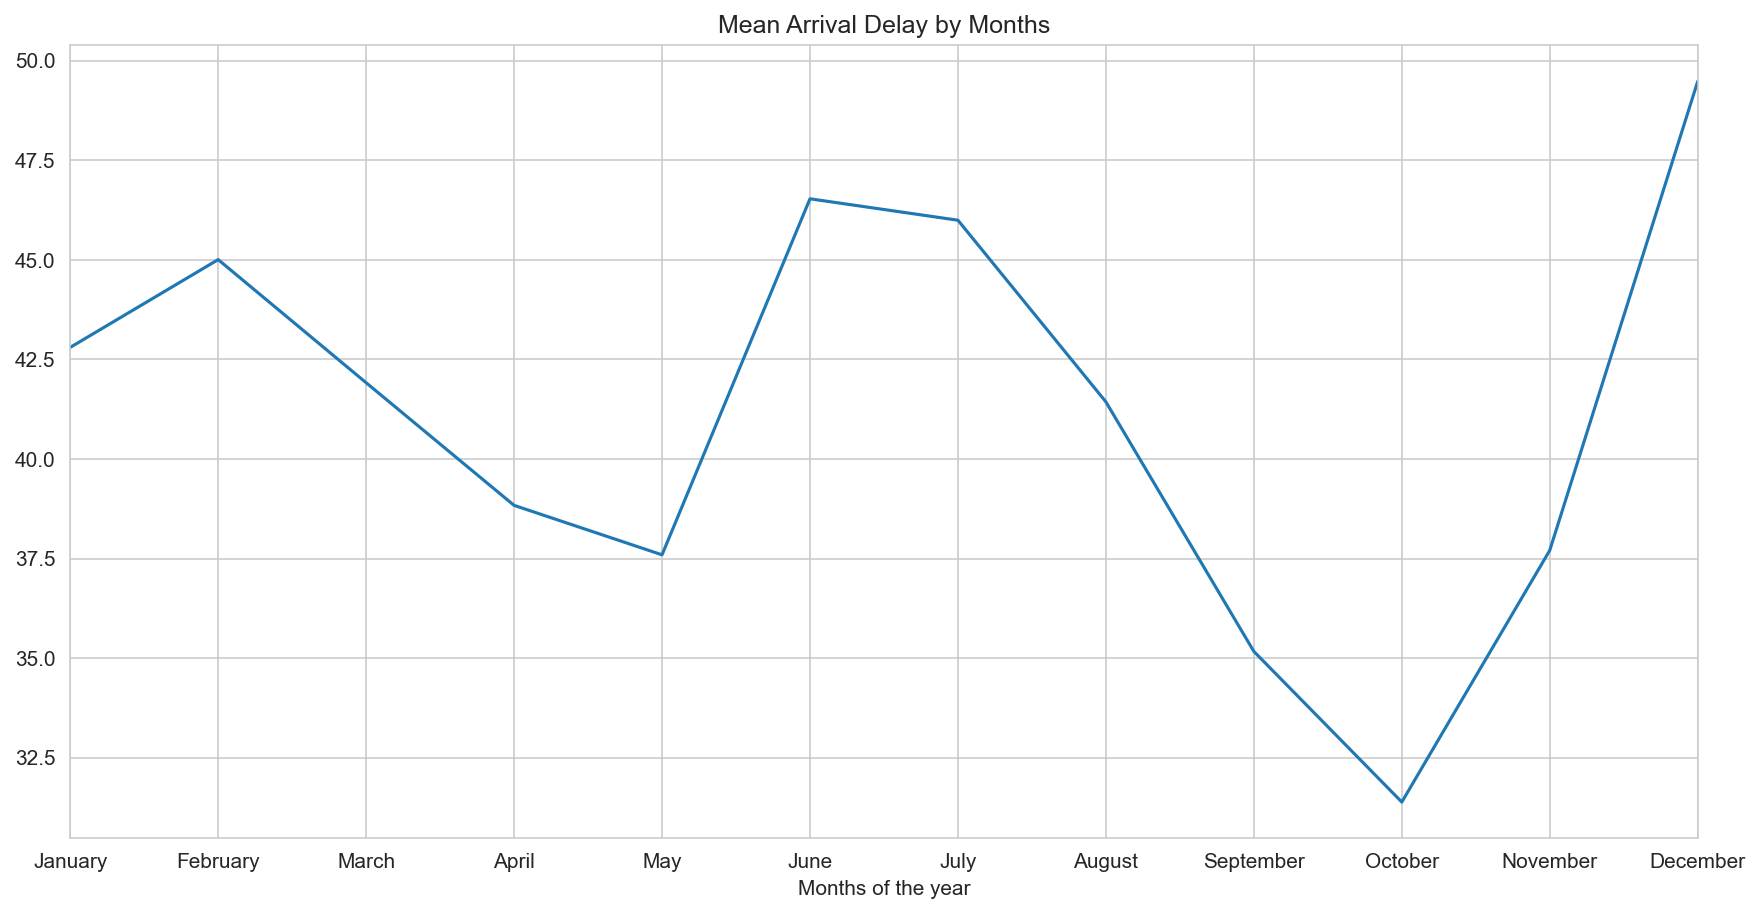

In [68]:
df.groupby(df.FlightDate.dt.month)['ArrDelay'].mean().plot(kind='line');
plt.title('Mean Arrival Delay by Months')
plt.xticks(np.arange(1,13,1), months);
plt.xlabel('Months of the year');

In 2008, mean arrival delay peaked in February, June and had the highest point in December. October had the lowest average arival delay. 

#### Mean Arrival Delay by Day of Week

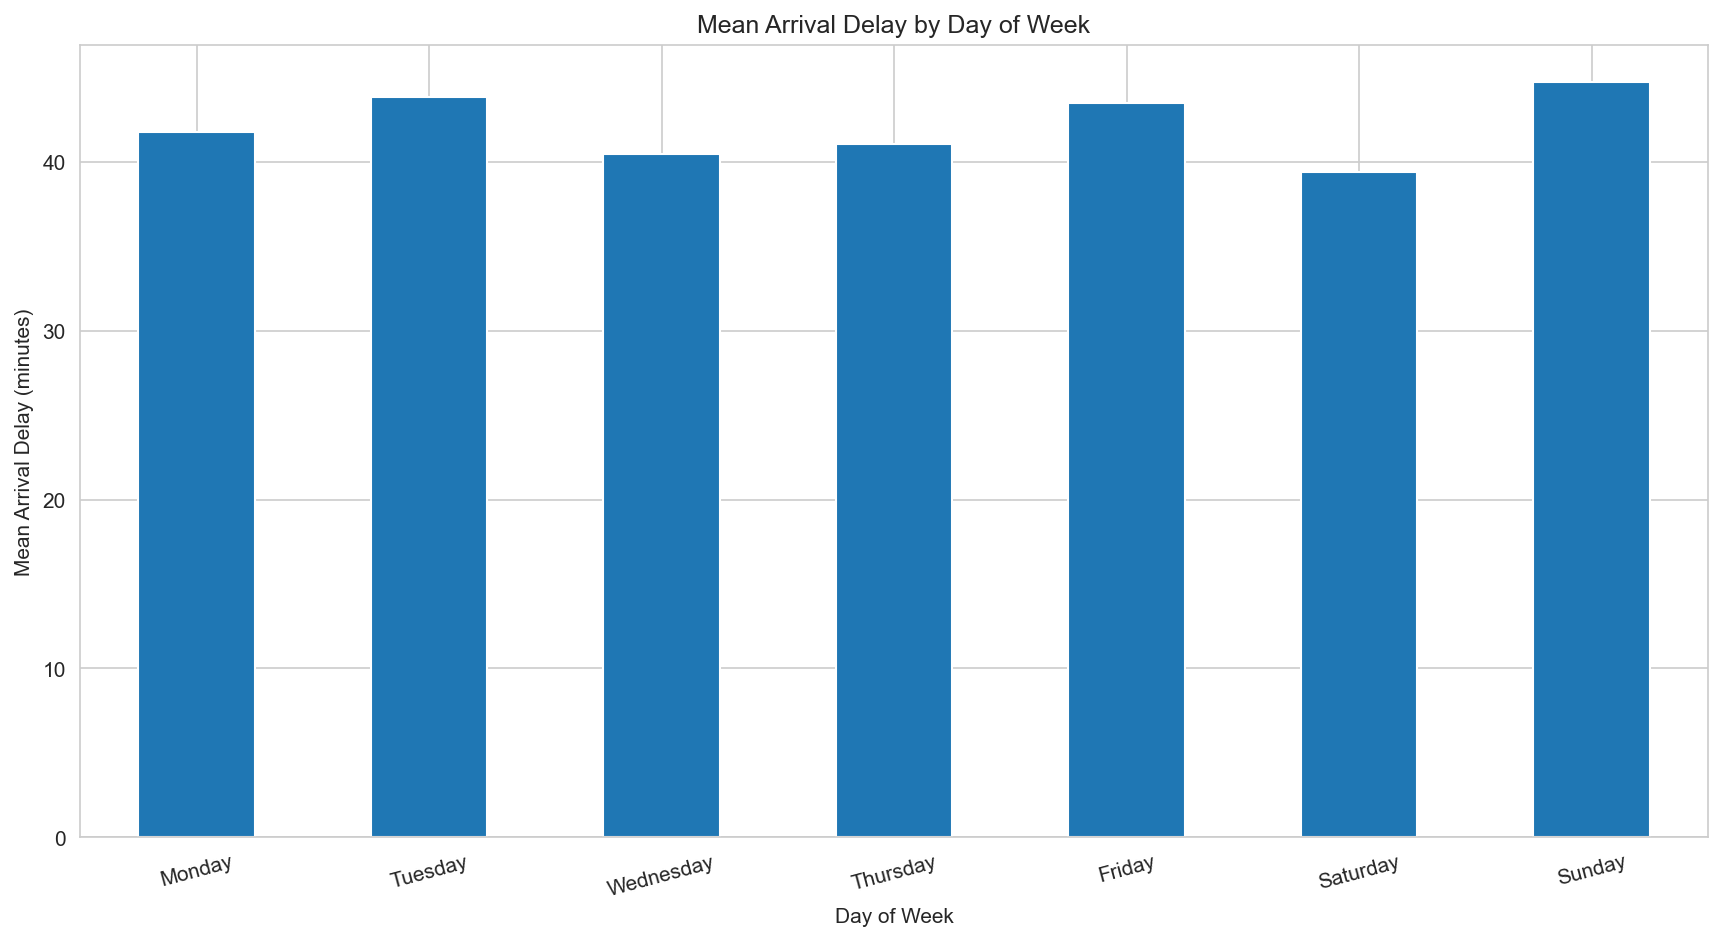

In [69]:
g = df.groupby(df.FlightDate.dt.weekday)['ArrDelay'].mean().plot(kind='bar');
g.set_xticklabels(days, rotation=15);
plt.xlabel('Day of Week');
plt.ylabel('Mean Arrival Delay (minutes)');
plt.title('Mean Arrival Delay by Day of Week');

Average arrival delay stayed nearly constant throught the week in 2008. 

#### Mean Arrival Delay by Carrier

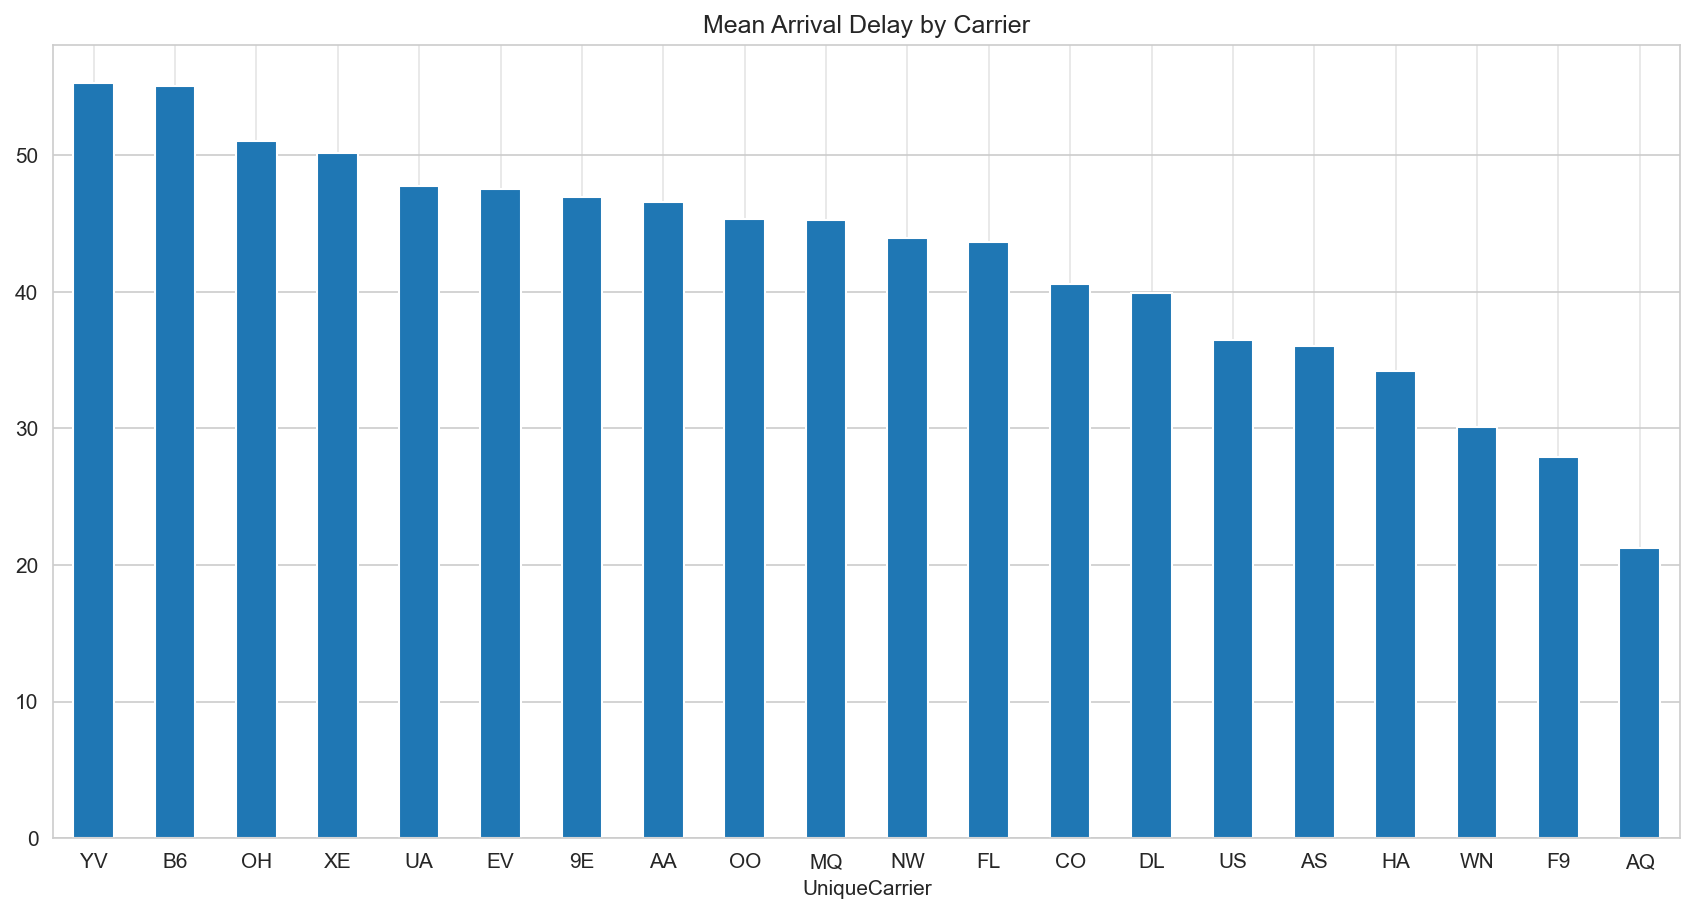

In [70]:
fig, ax = plt.subplots()
g = df.groupby('UniqueCarrier')['ArrDelay'].mean().sort_values(ascending=False).plot(kind='bar');
#ticks = [carrier_dict[x.get_text()] for x in ax.get_yticklabels()]
#ax.set_yticklabels(ticks);
plt.title('Mean Arrival Delay by Carrier');
plt.xticks(rotation=0);
g.grid('on', which='major', axis='x', alpha=0.5);

In [71]:
print([(i, carrier_dict[i]) for i in list(df.groupby('UniqueCarrier')['ArrDelay'].mean().index)])

[('9E', 'Pinnacle Airlines Inc.'), ('AA', 'American Airlines Inc.'), ('AQ', 'Aloha Airlines Inc.'), ('AS', 'Alaska Airlines Inc.'), ('B6', 'JetBlue Airways'), ('CO', 'Continental Air Lines Inc.'), ('DL', 'Delta Air Lines Inc.'), ('EV', 'Atlantic Southeast Airlines'), ('F9', 'Frontier Airlines Inc.'), ('FL', 'AirTran Airways Corporation'), ('HA', 'Hawaiian Airlines Inc.'), ('MQ', 'American Eagle Airlines Inc.'), ('NW', 'Northwest Airlines Inc.'), ('OH', 'Comair Inc.'), ('OO', 'Skywest Airlines Inc.'), ('UA', 'United Air Lines Inc.'), ('US', 'US Airways Inc.'), ('WN', 'Southwest Airlines Co.'), ('XE', 'Expressjet Airlines Inc.'), ('YV', 'Mesa Airlines Inc.')]


Mesa Airlines has the highest average arrival delay while Aloha Airlines has the lowest average arrival delay. 
I'd like to explore if there is any relationship to the pattern of flight count. 

#### Mean Arrival Delay by Flight Destination

In [72]:
# create dictionary to match airport to iata code
ap_dict = dict(zip(code_list, airport_list))

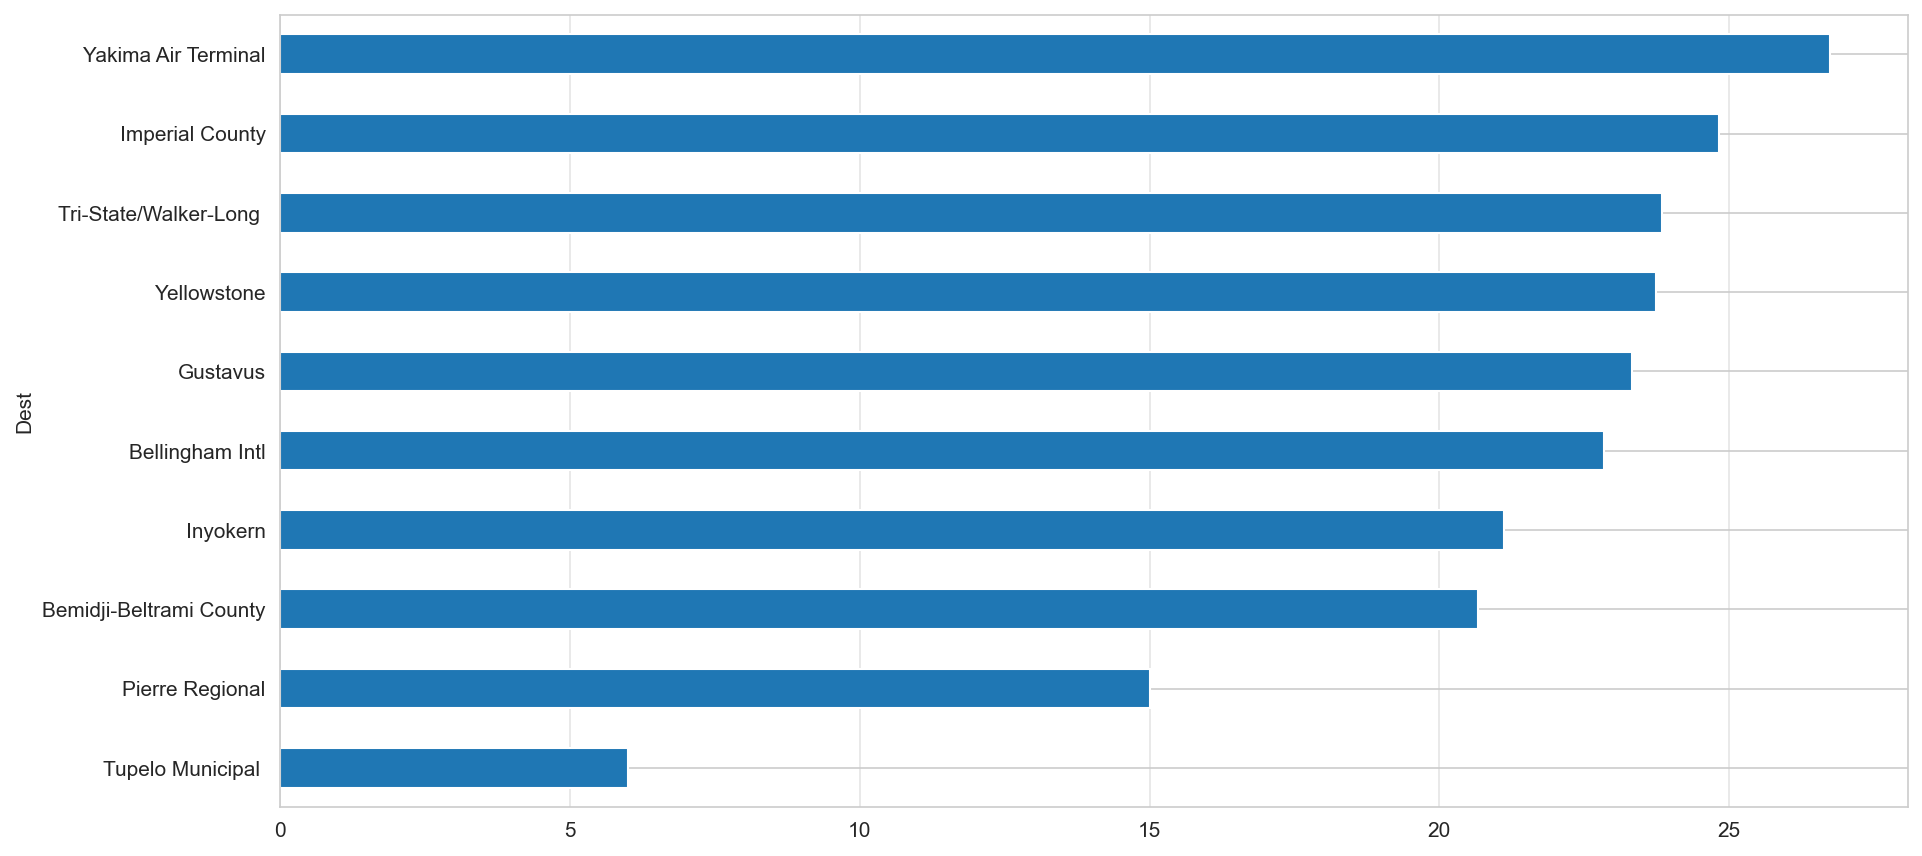

In [73]:
g = df.groupby('Dest')['ArrDelay'].mean().sort_values()[:10].plot(kind='barh');
ticks = [ap_dict[x.get_text()] for x in g.get_yticklabels()]
g.set_yticklabels(ticks);
g.grid('on', which='major', axis='x', alpha=0.5);

In [74]:
# top 10 highest mean delay airport in the 10 airports with the most flights
(df.groupby('Dest')['ArrDelay'].mean().sort_values()[:10].index.isin(dest_df.airport[:10])).sum()

0

None of the airports with the greatest associated mean arrival delay duration are in the top 10 busiest destination airports. 

This might indicate the busy airports having systems in place to minimize arrival delays. 

#### Diverted Flights per Unique Carrier 

In [75]:
df.query('FlightStatus == 3')['UniqueCarrier'].count()

7754

In [76]:
diverted = df.query('FlightStatus == 3')['UniqueCarrier']

cat_list = list(diverted.value_counts().index.map(carrier_dict))
for i in np.arange(len(diverted.value_counts().index)):
    print(f'{cat_list[i]} ({diverted.value_counts().index[i]}): {diverted.value_counts().values[i]} ({diverted.value_counts().values[i]/diverted.count()*100})')

Southwest Airlines Co. (WN): 1386 (17.874645344338404)
American Airlines Inc. (AA): 909 (11.722981686871293)
American Eagle Airlines Inc. (MQ): 593 (7.647665720918235)
Skywest Airlines Inc. (OO): 564 (7.2736652050554556)
Delta Air Lines Inc. (DL): 489 (6.306422491617229)
United Air Lines Inc. (UA): 475 (6.1258705184420945)
Expressjet Airlines Inc. (XE): 470 (6.061387670879546)
Continental Air Lines Inc. (CO): 426 (5.493938612329121)
US Airways Inc. (US): 392 (5.055455248903792)
JetBlue Airways (B6): 380 (4.900696414753676)
AirTran Airways Corporation (FL): 308 (3.9721434098529786)
Alaska Airlines Inc. (AS): 272 (3.5078669074026307)
Pinnacle Airlines Inc. (9E): 258 (3.3273149342274952)
Northwest Airlines Inc. (NW): 249 (3.2112458086149083)
Mesa Airlines Inc. (YV): 241 (3.108073252514831)
Comair Inc. (OH): 192 (2.476141346401857)
Atlantic Southeast Airlines (EV): 86 (1.1091049780758317)
Frontier Airlines Inc. (F9): 43 (0.5545524890379159)
Hawaiian Airlines Inc. (HA): 15 (0.19344854268764

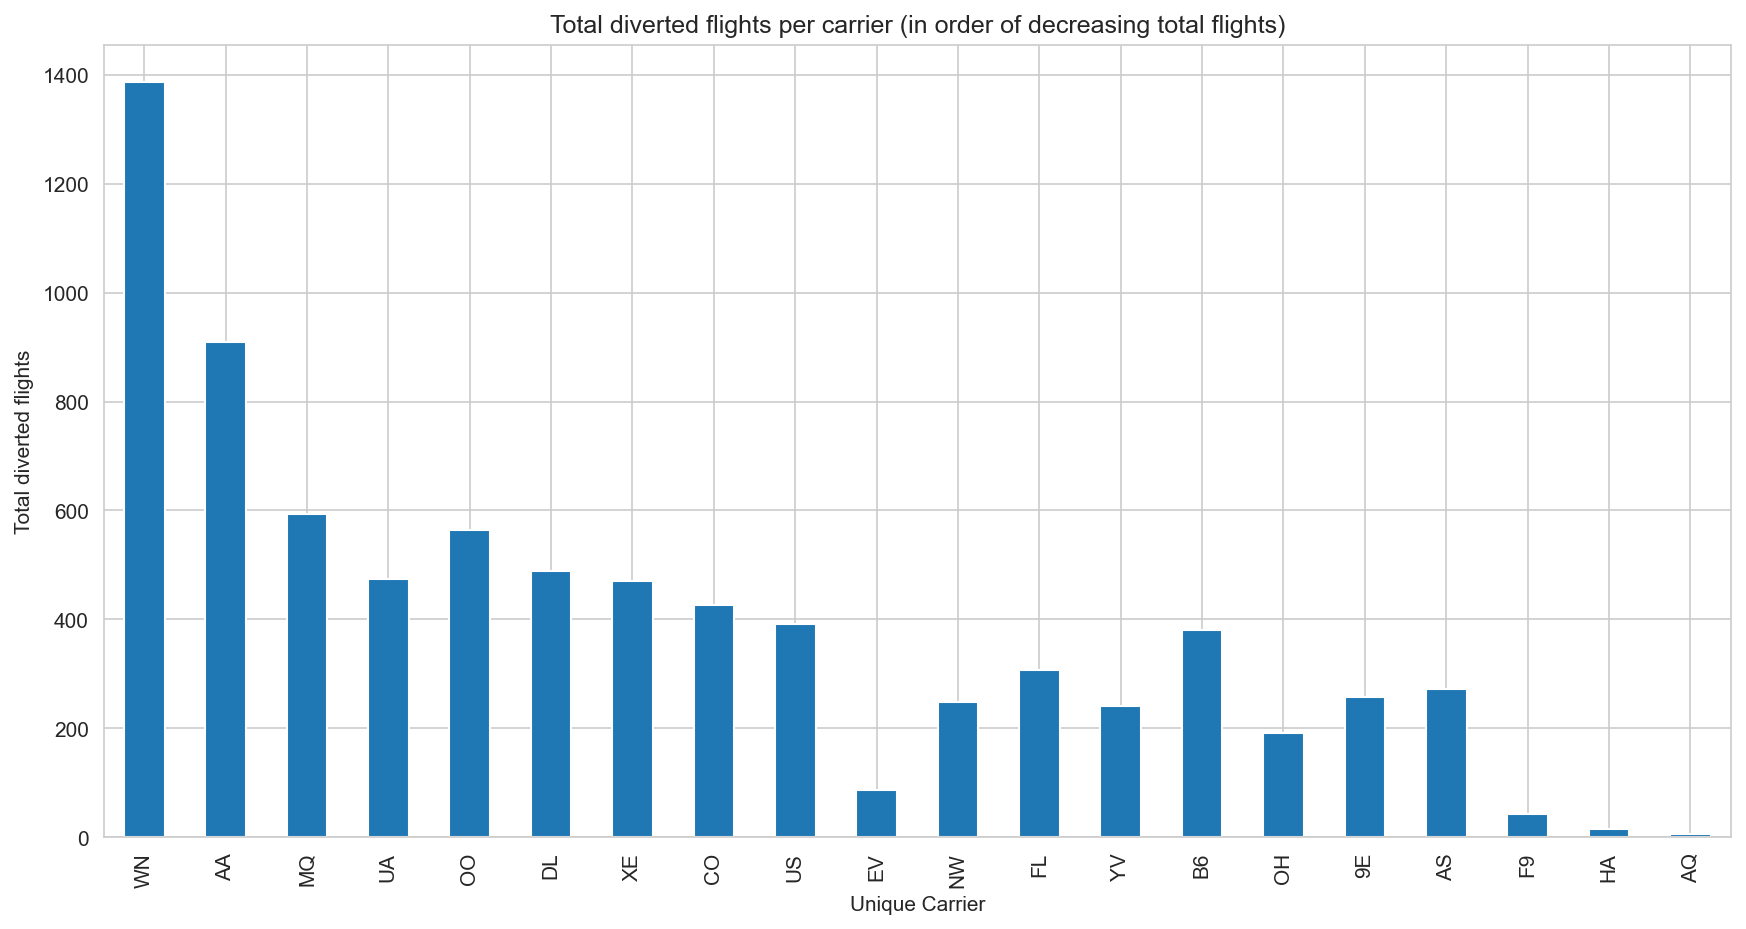

In [77]:
diverted.value_counts().reindex(df.UniqueCarrier.value_counts().index).plot(kind='bar');
plt.title('Total diverted flights per carrier (in order of decreasing total flights)');
plt.xlabel('Unique Carrier');
plt.ylabel('Total diverted flights');

There is a decrease in total number of diverted flights with decrease in total number of flights operated per carrier. 

#### Cancelled Flights per Unique Carrier

In [78]:
cancelled = df.query('FlightStatus == 4')['UniqueCarrier']

cat_list = list(cancelled.value_counts().index.map(carrier_dict))
for i in np.arange(len(cancelled.value_counts().index)):
    print(f'{cat_list[i]} ({cancelled.value_counts().index[i]}): {cancelled.value_counts().values[i]} ({cancelled.value_counts().values[i]/cancelled.count()*100})')

American Eagle Airlines Inc. (MQ): 104 (16.429699842022117)
Skywest Airlines Inc. (OO): 89 (14.06003159557662)
Pinnacle Airlines Inc. (9E): 58 (9.162717219589258)
Mesa Airlines Inc. (YV): 53 (8.372827804107425)
United Air Lines Inc. (UA): 47 (7.424960505529225)
Expressjet Airlines Inc. (XE): 46 (7.266982622432859)
American Airlines Inc. (AA): 46 (7.266982622432859)
Continental Air Lines Inc. (CO): 38 (6.003159557661927)
Atlantic Southeast Airlines (EV): 29 (4.581358609794629)
US Airways Inc. (US): 26 (4.107424960505529)
Delta Air Lines Inc. (DL): 21 (3.3175355450236967)
Northwest Airlines Inc. (NW): 16 (2.527646129541864)
Southwest Airlines Co. (WN): 15 (2.3696682464454977)
Comair Inc. (OH): 12 (1.8957345971563981)
Alaska Airlines Inc. (AS): 11 (1.7377567140600316)
JetBlue Airways (B6): 10 (1.579778830963665)
AirTran Airways Corporation (FL): 7 (1.1058451816745656)
Hawaiian Airlines Inc. (HA): 3 (0.47393364928909953)
Frontier Airlines Inc. (F9): 2 (0.315955766192733)


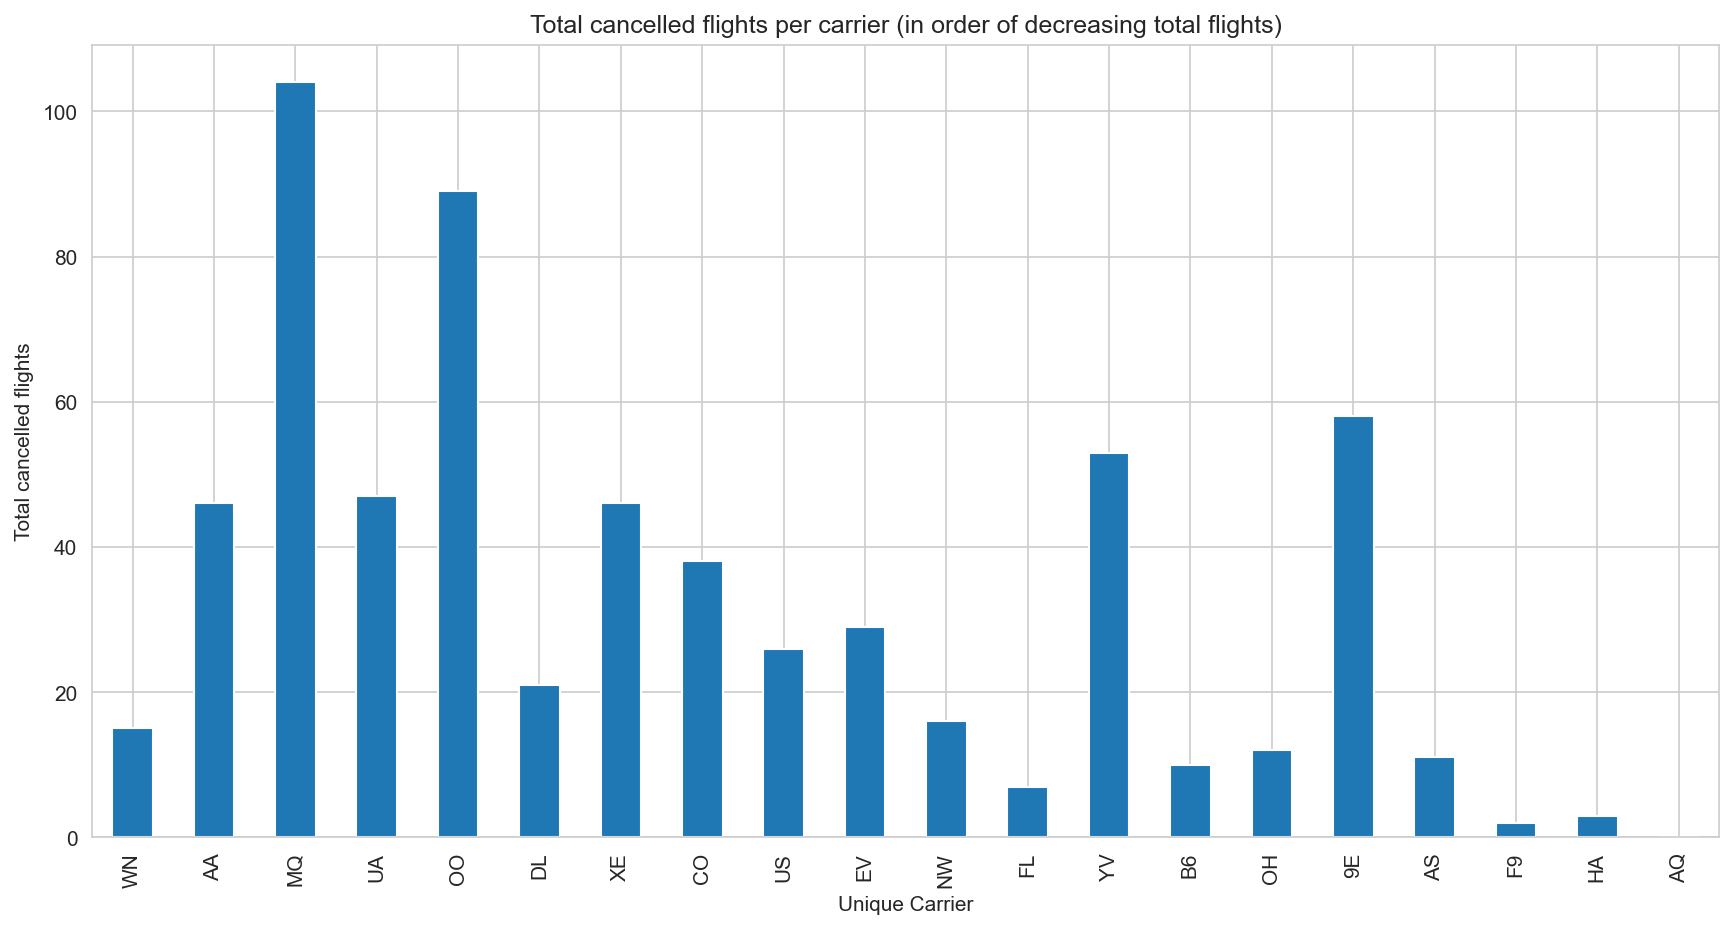

In [79]:
cancelled.value_counts().reindex(df.UniqueCarrier.value_counts().index).plot(kind='bar');
plt.title('Total cancelled flights per carrier (in order of decreasing total flights)');
plt.xlabel('Unique Carrier');
plt.ylabel('Total cancelled flights');

There is no observed relationship between total flights operated and total flights cancelled per carrier. 

#### CarrierDelay per Carrier

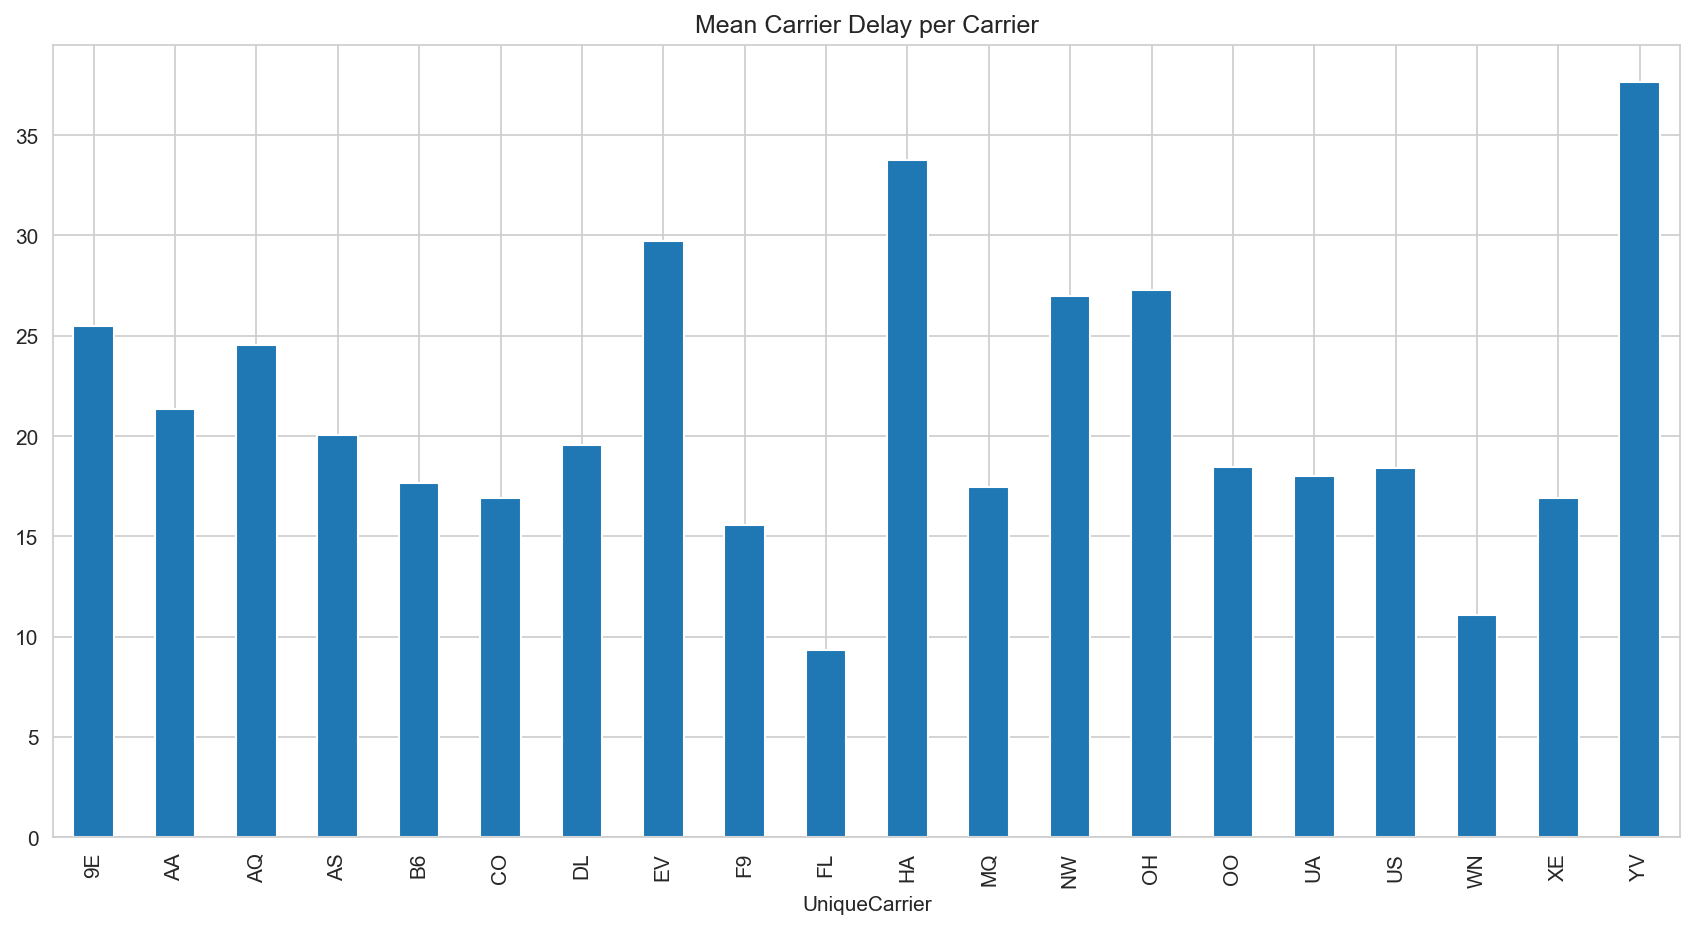

In [80]:
df.groupby('UniqueCarrier')['CarrierDelay'].mean().plot(kind='bar');
plt.title('Mean Carrier Delay per Carrier');

In [81]:
print([(i, carrier_dict[i]) for i in list(df.groupby('UniqueCarrier')['ArrDelay'].mean().index)])

[('9E', 'Pinnacle Airlines Inc.'), ('AA', 'American Airlines Inc.'), ('AQ', 'Aloha Airlines Inc.'), ('AS', 'Alaska Airlines Inc.'), ('B6', 'JetBlue Airways'), ('CO', 'Continental Air Lines Inc.'), ('DL', 'Delta Air Lines Inc.'), ('EV', 'Atlantic Southeast Airlines'), ('F9', 'Frontier Airlines Inc.'), ('FL', 'AirTran Airways Corporation'), ('HA', 'Hawaiian Airlines Inc.'), ('MQ', 'American Eagle Airlines Inc.'), ('NW', 'Northwest Airlines Inc.'), ('OH', 'Comair Inc.'), ('OO', 'Skywest Airlines Inc.'), ('UA', 'United Air Lines Inc.'), ('US', 'US Airways Inc.'), ('WN', 'Southwest Airlines Co.'), ('XE', 'Expressjet Airlines Inc.'), ('YV', 'Mesa Airlines Inc.')]


Mesa Airlines is the carrier with the highest average carrier delay while AirTran Airways Corporation is the carrier with the least average carrier delay. 

#### Late Aircraft Delay per Carrier

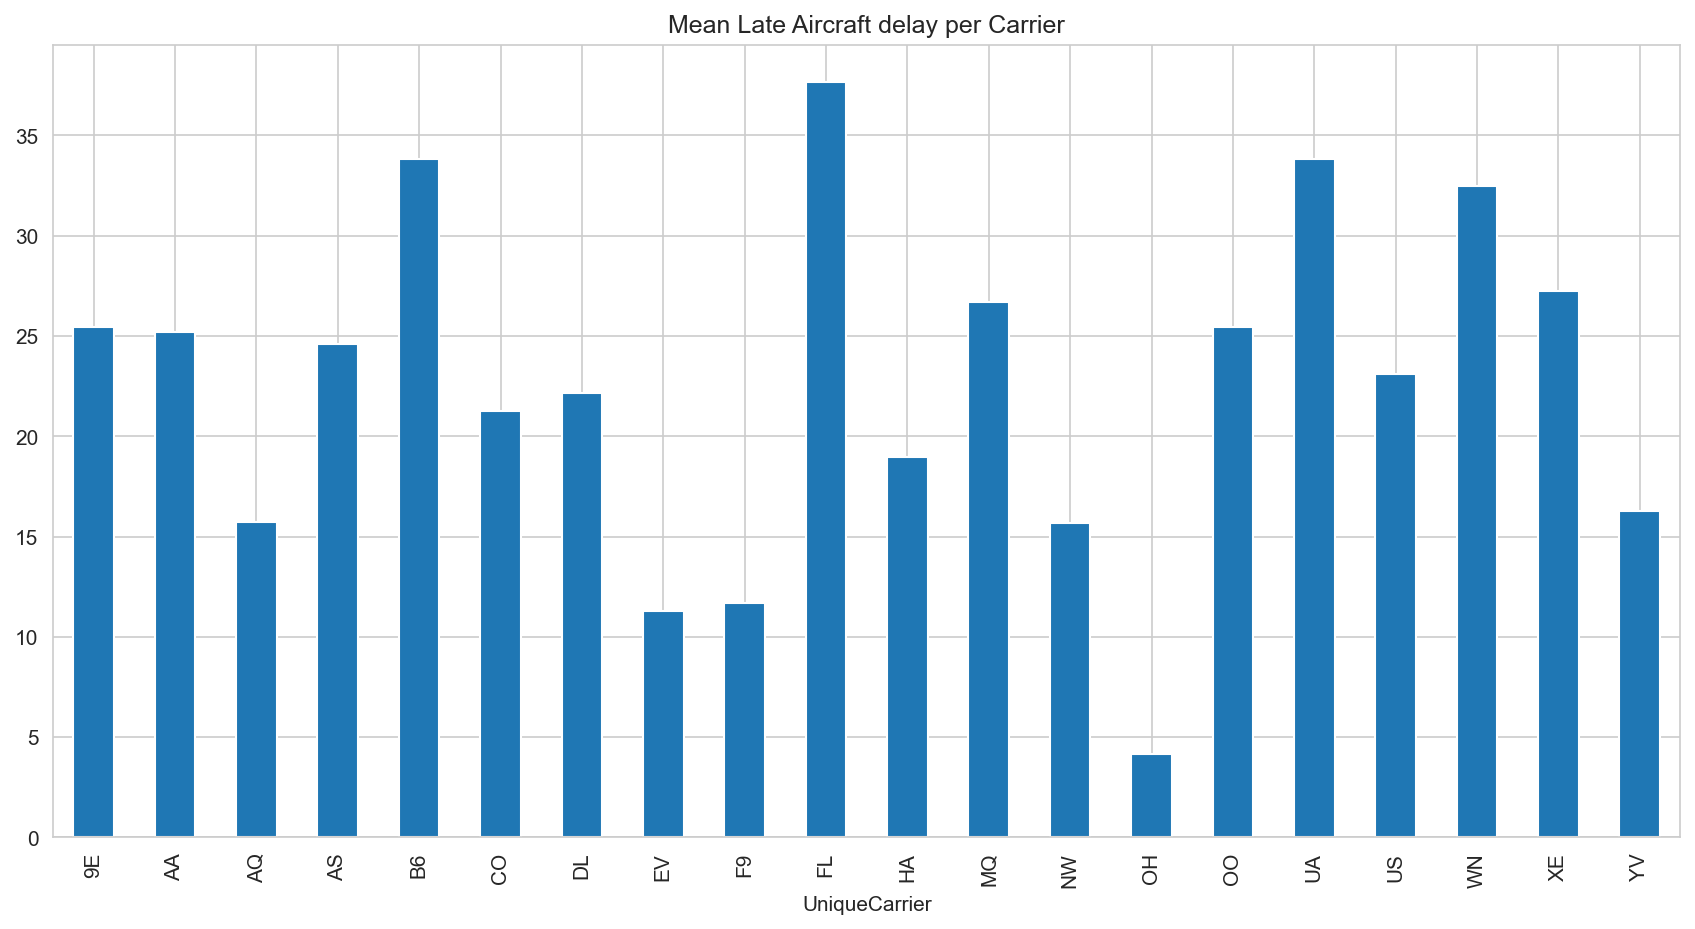

In [82]:
df.groupby('UniqueCarrier')['LateAircraftDelay'].mean().plot(kind='bar');
plt.title('Mean Late Aircraft delay per Carrier');

In [83]:
print([(i, carrier_dict[i]) for i in list(df.groupby('UniqueCarrier')['ArrDelay'].mean().index)])

[('9E', 'Pinnacle Airlines Inc.'), ('AA', 'American Airlines Inc.'), ('AQ', 'Aloha Airlines Inc.'), ('AS', 'Alaska Airlines Inc.'), ('B6', 'JetBlue Airways'), ('CO', 'Continental Air Lines Inc.'), ('DL', 'Delta Air Lines Inc.'), ('EV', 'Atlantic Southeast Airlines'), ('F9', 'Frontier Airlines Inc.'), ('FL', 'AirTran Airways Corporation'), ('HA', 'Hawaiian Airlines Inc.'), ('MQ', 'American Eagle Airlines Inc.'), ('NW', 'Northwest Airlines Inc.'), ('OH', 'Comair Inc.'), ('OO', 'Skywest Airlines Inc.'), ('UA', 'United Air Lines Inc.'), ('US', 'US Airways Inc.'), ('WN', 'Southwest Airlines Co.'), ('XE', 'Expressjet Airlines Inc.'), ('YV', 'Mesa Airlines Inc.')]


AirTran Airways Corporation is the carrier with the highest average late aircraft delay while Comair has the lowest average late aircraft delay. 

It should be noted that the carrier with the highest average late aircraft delay also has the lowest carrier delay. 

#### National Air Service Delay per Destination

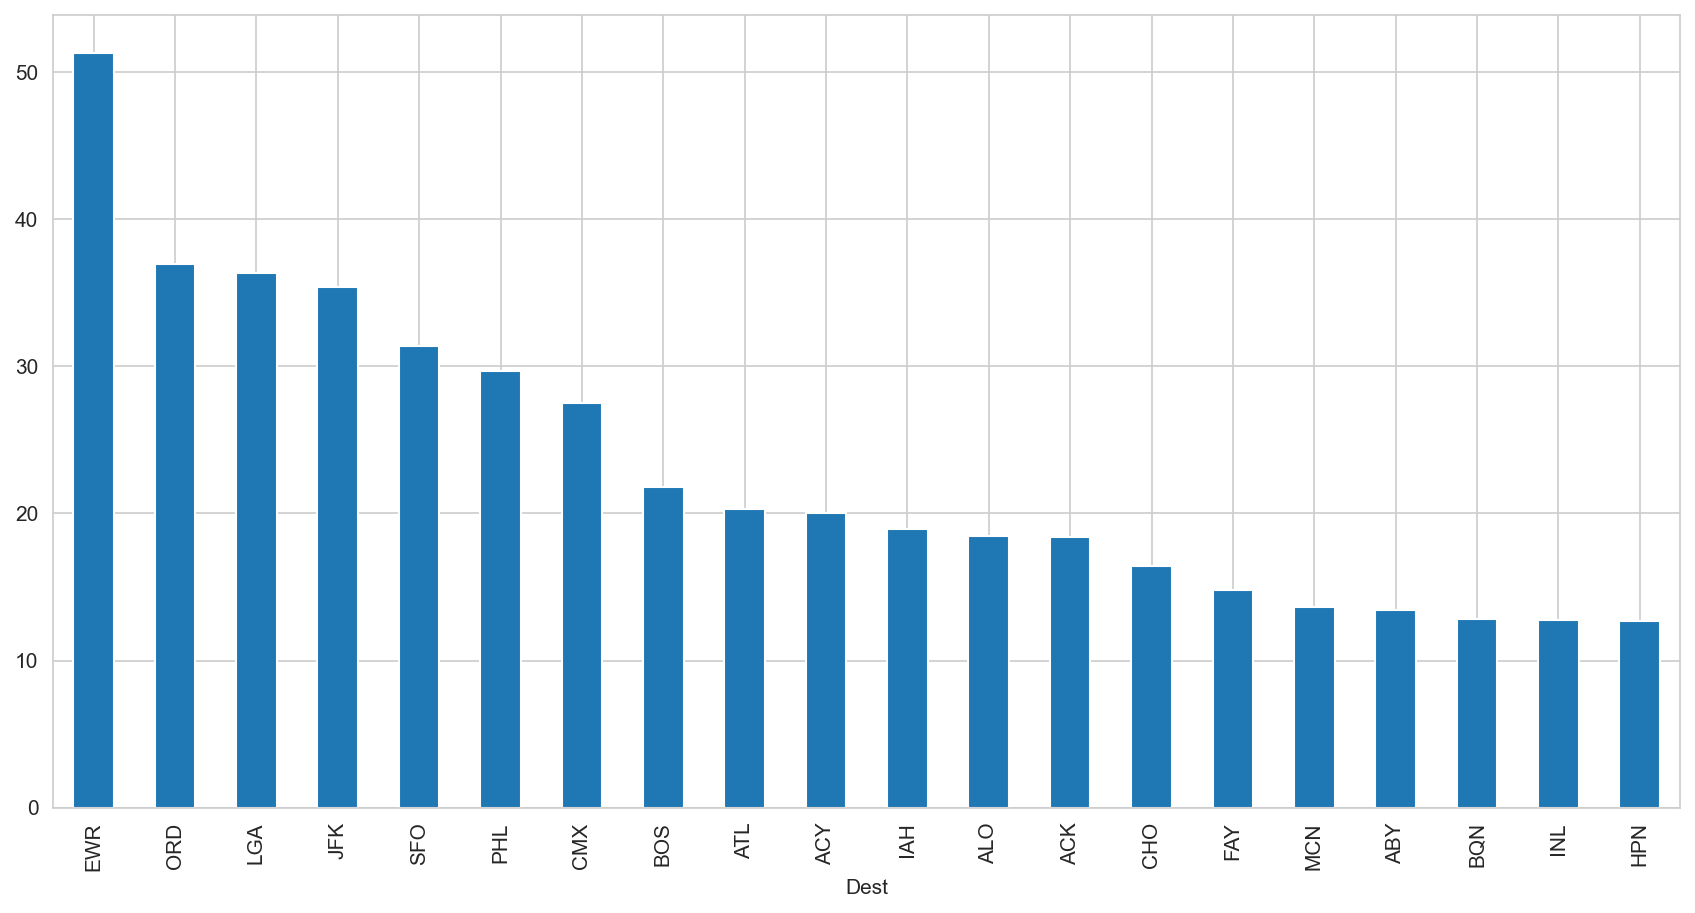

In [84]:
df.groupby('Dest')['NASDelay'].mean().sort_values(ascending=False)[:20].plot(kind='bar');

In [85]:
index_list = df.groupby('Dest')['NASDelay'].mean().sort_values(ascending=False)[:20].index
print([(i, airport_list[code_list.index(i)]) for i in list(index_list)])

[('EWR', 'Newark Intl'), ('ORD', "Chicago O'Hare International"), ('LGA', 'LaGuardia'), ('JFK', 'John F Kennedy Intl'), ('SFO', 'San Francisco International'), ('PHL', 'Philadelphia Intl'), ('CMX', 'Houghton County Memorial'), ('BOS', 'Gen Edw L Logan Intl'), ('ATL', 'William B Hartsfield-Atlanta Intl'), ('ACY', 'Atlantic City International'), ('IAH', 'George Bush Intercontinental'), ('ALO', 'Waterloo Municipal'), ('ACK', 'Nantucket Memorial'), ('CHO', 'Charlottesville-Albermarle'), ('FAY', 'Fayetteville Municipal'), ('MCN', 'Middle Georgia Regional'), ('ABY', 'Southwest Georgia Regional'), ('BQN', 'Rafael Hernandez'), ('INL', 'Falls International'), ('HPN', 'Westchester Cty')]


Newark International is the destination airport with the greatest associated National Air Service delay duration, the only airport with this delay lasts longer that 40 minutes. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Mean arrival delay peaked in the months of February, June and December. 
- None of the airports with the highest average arrival delay were in the top 10 busiest airports. 
- CarrierDelay, NASDelay and Late AircraftDelay have the highest correlated with ArrDelay
- The carrier with the highest average late aircraft delay has the lowest carrier delay. (AirTran Airways)

I will explore the individual delay causes and their variation with FlightDate in the next section. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a decrease in total number of diverted flights with decrease in total number of flights operated per carrier.

## Multivariate Exploration

#### Mean Arrival Delay per Carrier in descending order of total flights operated

In [86]:
df.ArrDelay.mean()

42.19988238765506

[('9E', 'Pinnacle Airlines Inc.'), ('AA', 'American Airlines Inc.'), ('AQ', 'Aloha Airlines Inc.'), ('AS', 'Alaska Airlines Inc.'), ('B6', 'JetBlue Airways'), ('CO', 'Continental Air Lines Inc.'), ('DL', 'Delta Air Lines Inc.'), ('EV', 'Atlantic Southeast Airlines'), ('F9', 'Frontier Airlines Inc.'), ('FL', 'AirTran Airways Corporation'), ('HA', 'Hawaiian Airlines Inc.'), ('MQ', 'American Eagle Airlines Inc.'), ('NW', 'Northwest Airlines Inc.'), ('OH', 'Comair Inc.'), ('OO', 'Skywest Airlines Inc.'), ('UA', 'United Air Lines Inc.'), ('US', 'US Airways Inc.'), ('WN', 'Southwest Airlines Co.'), ('XE', 'Expressjet Airlines Inc.'), ('YV', 'Mesa Airlines Inc.')]


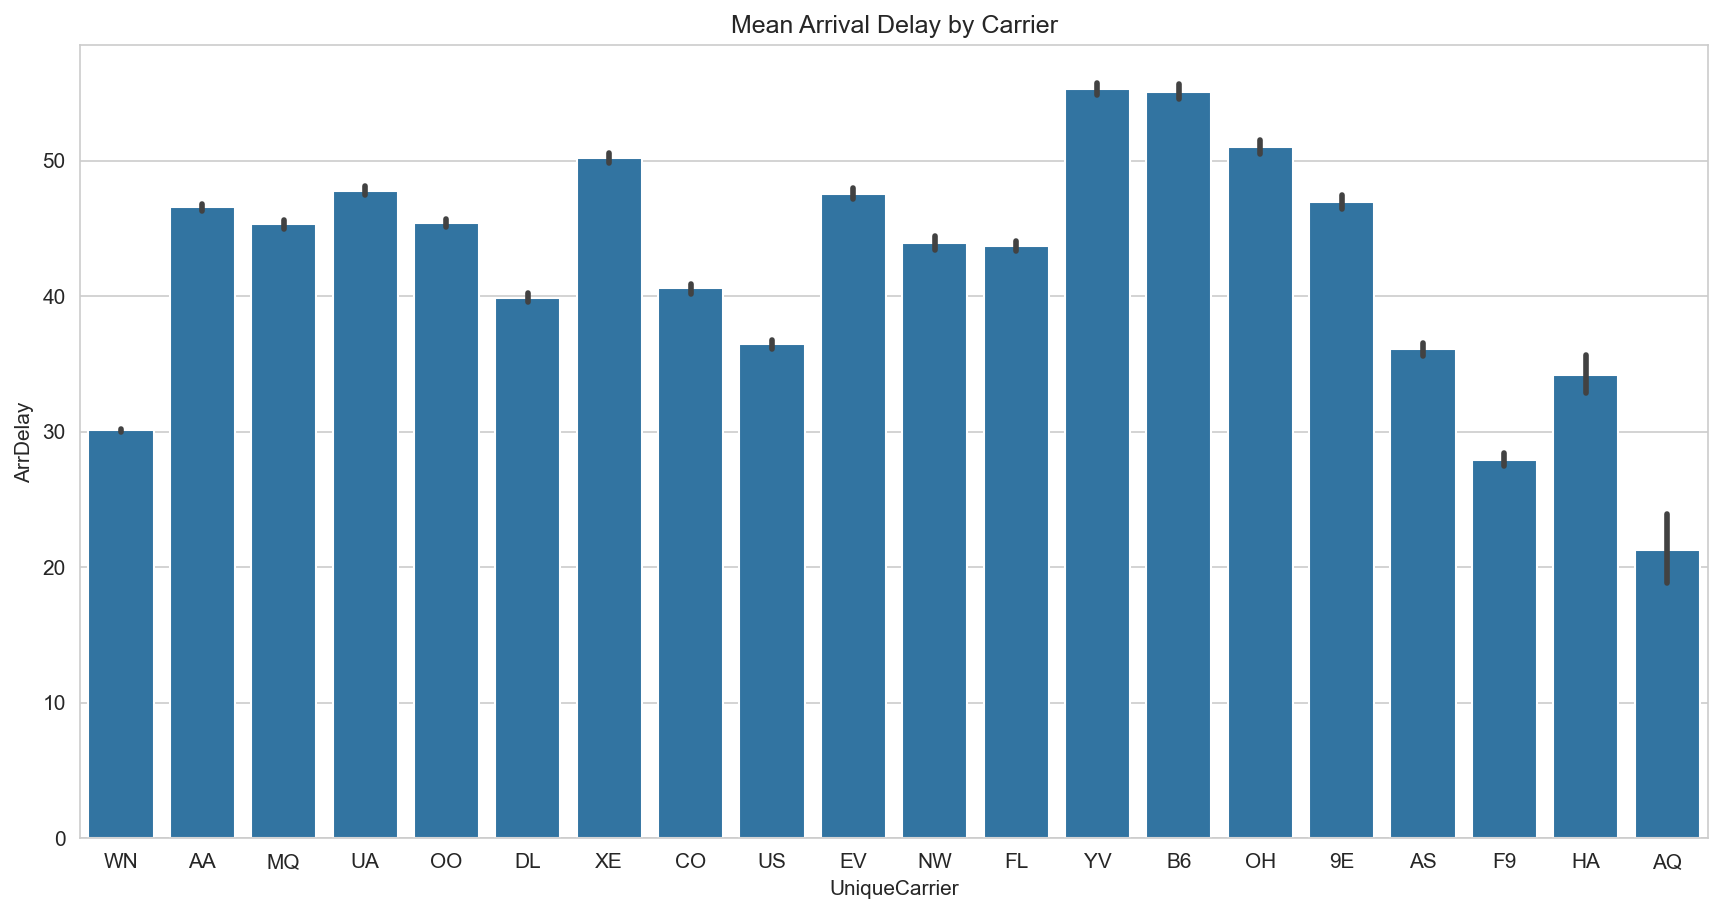

In [87]:
sb.barplot(data=df, x='UniqueCarrier', y='ArrDelay', order=df.UniqueCarrier.value_counts().index, color=sb.color_palette()[0]);
plt.title('Mean Arrival Delay by Carrier');
plt.xticks(rotation=0);

print([(i, carrier_dict[i]) for i in list(df.groupby('UniqueCarrier')['ArrDelay'].mean().index)])

The above barplot is arranged in order of decreasing flight count. 
8 carriers had an average delay below the overall average. Only 4 of these carriers are in the top 10 busiest carriers ie Southwest Airlines, Delta Air Lines, Continental Airlines and US Airlines.

An observed trend is that carriers with fewer flights had more widely distributed arrival delay durations. 

#### Delay Causes by FlightDate

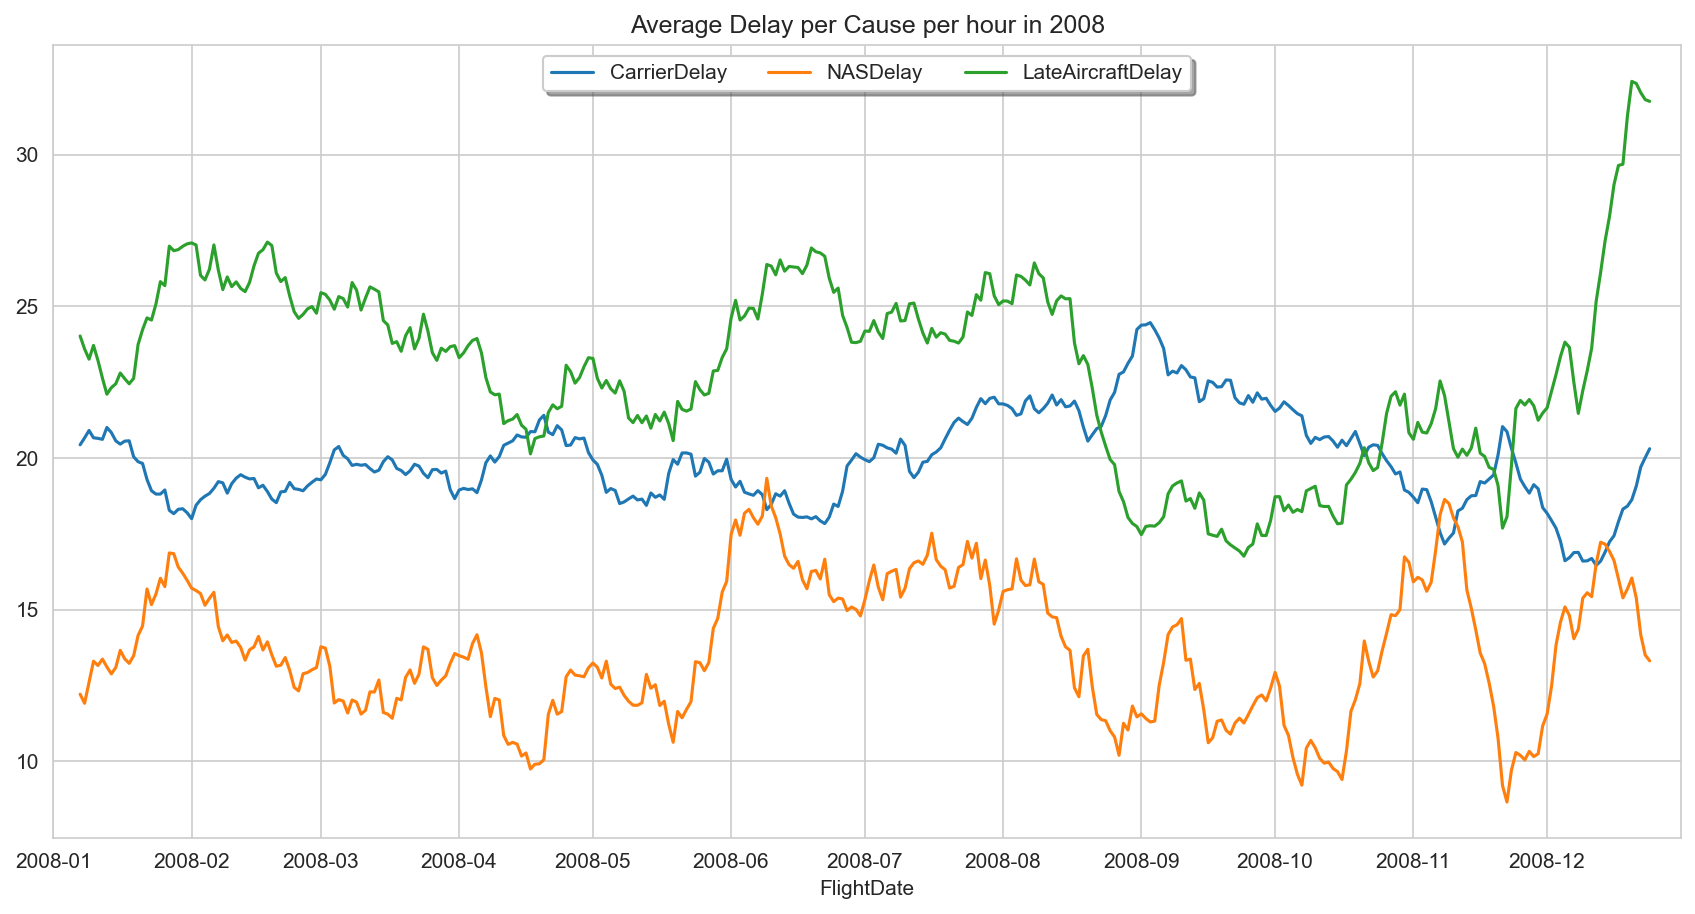

In [88]:
g = df.groupby(df.FlightDate.dt.date)['CarrierDelay','NASDelay','LateAircraftDelay'].mean().rolling(14).mean().shift(-7).plot()
g.legend(loc='upper center', ncol=3, fancybox=True, shadow=True);
plt.title('Average Delay per Cause per hour in 2008');

Late aircraft delay has the highest mean duration for most of 2008. Carrier delay does not follow the general trends of the other two causes. 

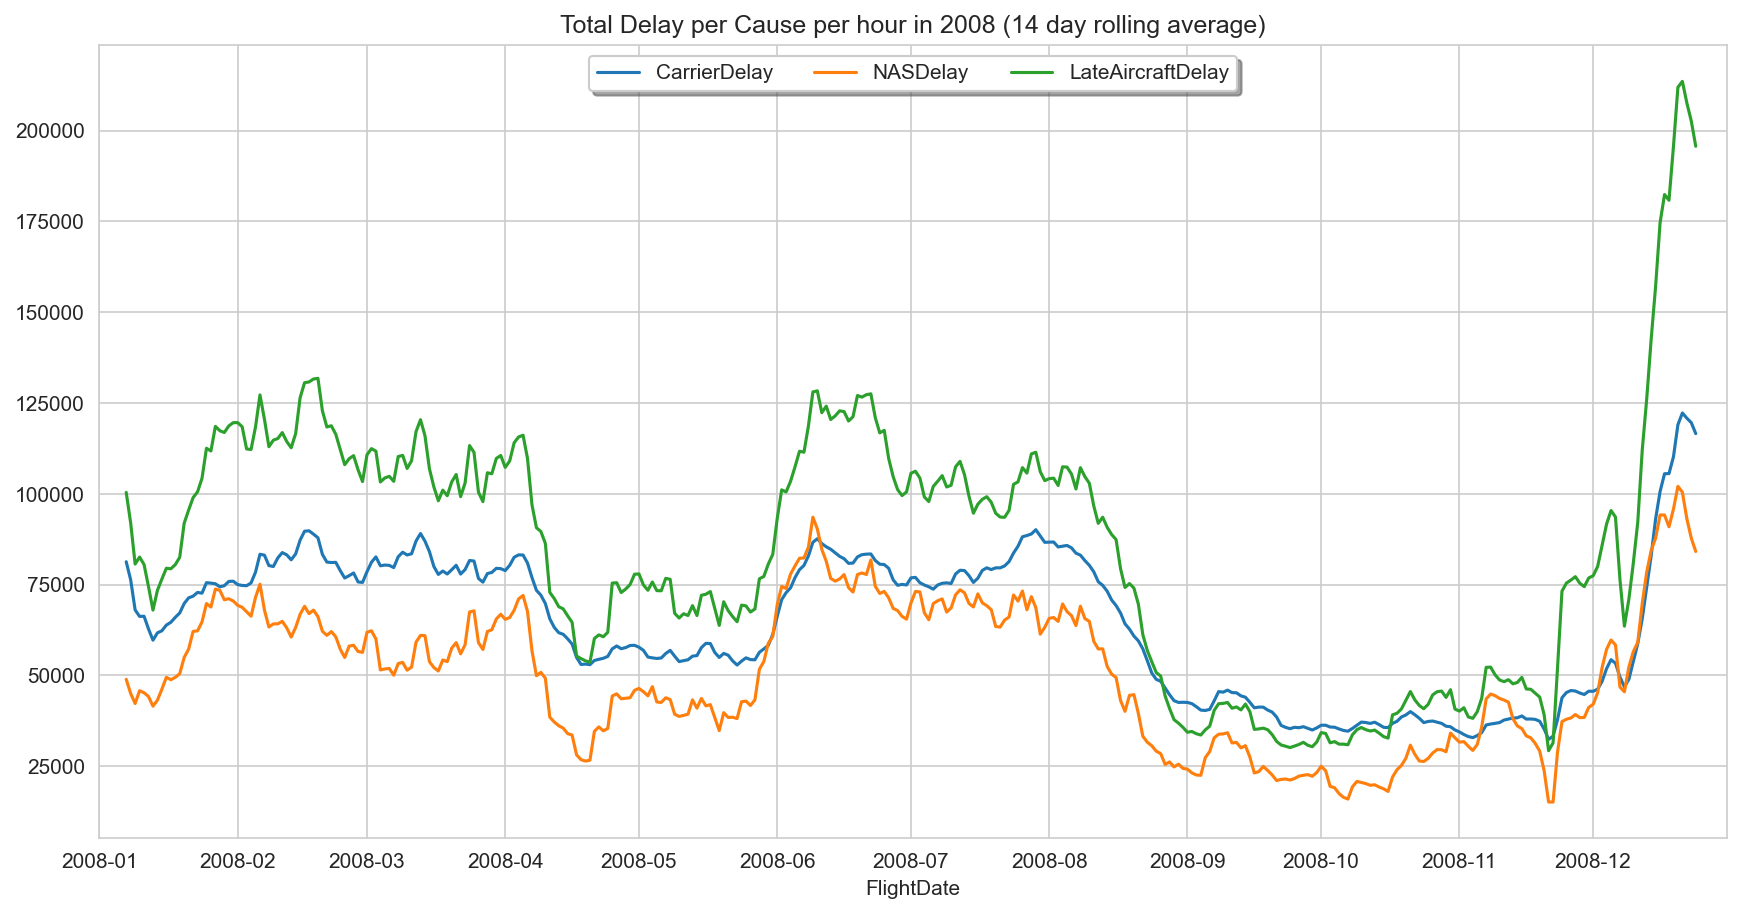

In [89]:
g = df.groupby(df.FlightDate.dt.date)['CarrierDelay','NASDelay','LateAircraftDelay'].sum().rolling(14).mean().shift(-7).plot()
g.legend(loc='upper center', ncol=3, fancybox=True, shadow=True)
plt.title('Total Delay per Cause per hour in 2008 (14 day rolling average)');

The trends of total carrier, national air service and late aircraft delays follow the same pattern as the mean arrival delay for the duration of 2008. 

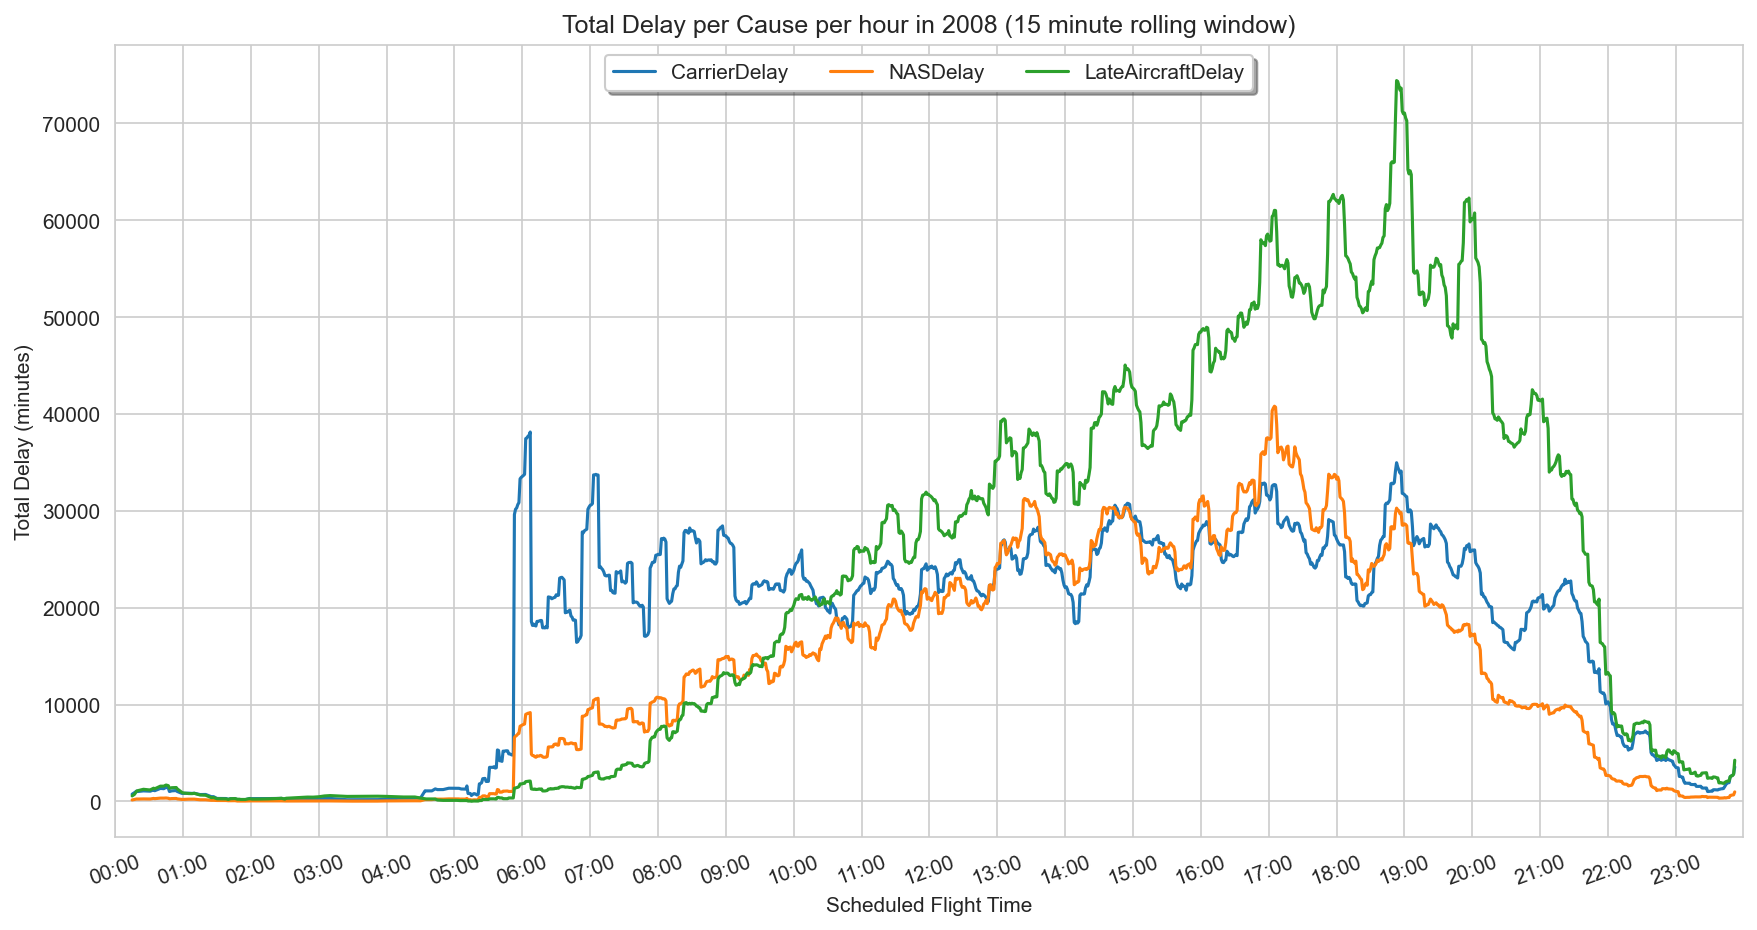

In [90]:
g = df.groupby(df.FlightDate.dt.time)['CarrierDelay','NASDelay','LateAircraftDelay'].sum().rolling(15).mean().shift(-7).plot()
g.legend(loc='upper center', ncol=3, fancybox=True, shadow=True)
hours = [dt.time(i).strftime('%H:%M') for i in range(24)]
plt.xticks(hours, hours, rotation=20);
plt.title('Total Delay per Cause per hour in 2008 (15 minute rolling window)');
plt.xlabel('Scheduled Flight Time');
plt.ylabel('Total Delay (minutes)');

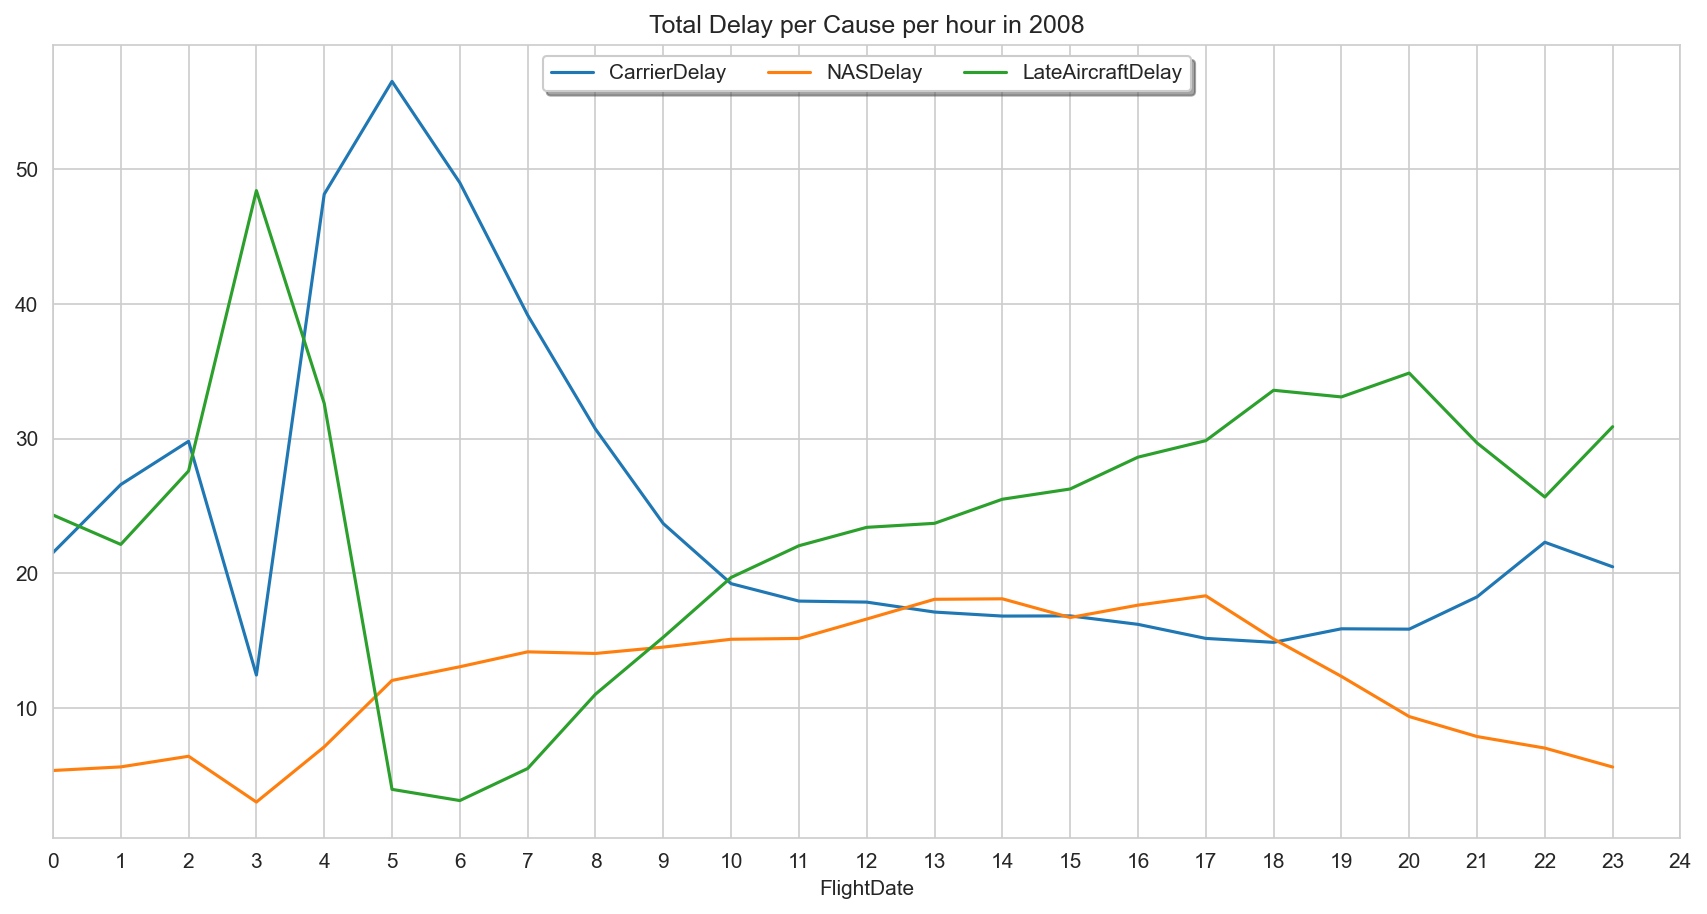

In [91]:
g = df.groupby(df.FlightDate.dt.hour)['CarrierDelay','NASDelay','LateAircraftDelay'].mean().plot()
g.legend(loc='upper center', ncol=3, fancybox=True, shadow=True)
plt.title('Total Delay per Cause per hour in 2008');
hours = np.arange(0,25,1)
plt.xticks(hours, hours);

From the above graphs, delays on flights departing betweet 6am and 10am can mostly be attributed to carrier delays and between 10am and 10pm, late aircrafts cause the most delays. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this section, I decided to first explore the mean arrival delay per carrier in descending order of total flights operated by carrier. This showed the carriers with fewer total flights operated had a wider distribution of delay duration. Among the 8 carriers with the fewest total flights operated, there was a decrease in mean arrival delay. 

### Were there any interesting or surprising interactions between features?

Late Aircrafts accounting for majority of the delays between 6am and 10am was unexpected. 